In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_conf=pd.read_csv("time_series_covid19_confirmed_global.csv")
df_death=pd.read_csv("time_series_covid19_deaths_global.csv")
df_rec=pd.read_csv("time_series_covid19_recovered_global.csv")

print("conf_shape:", df_conf.shape)
print("death_shape:", df_death.shape)
print("rec_shape:", df_rec.shape)

conf_shape: (266, 177)
death_shape: (266, 177)
rec_shape: (253, 177)


## Time Series total death

In [3]:
def stats_calculator(df_conf,df_death,df_rec):
    """
    Docstring:
    Calculate the number of Total Deaths, Confirmed Cases, Recoveries, New Cases and Mortality Rate each day
    
    Takes in confirmed, death and recovered dataframes as argument
    Return a dataframe
    """
    #Extract dates
    date=df_death.keys()[4:]
    
    #Initialize Stats
    total_death_date=[]
    total_rec_date=[]
    total_conf_date=[]
    mortality_rate=[]
    active_cases=[]
    
    #Append Stats
    for i in date:
        total_death_date.append(df_death[i].sum())
        total_rec_date.append(df_rec[i].sum())
        total_conf_date.append(df_conf[i].sum())
        mortality_rate.append(df_death[i].sum()*100/df_conf[i].sum())
        active_cases.append(df_conf[i].sum()-df_death[i].sum()-df_rec[i].sum())

    #Make stats into a dataframe
    df_temp_dict={"Date":date, "Death":total_death_date,"Rec":total_rec_date,
                  "Conf":total_conf_date,"MortRate":mortality_rate,"Active":active_cases}
    df_temp=pd.DataFrame(df_temp_dict)
    df_temp['NewConf']=df_temp.Conf
    for i in range(1,df_temp.shape[0]):
        df_temp.NewConf[i]=df_temp.Conf[i]-df_temp.Conf[i-1]
    
    #Return dataframe
    return(df_temp)

In [4]:
def stats_plotter(df_temp):
    """
    Docstring: 
    Input dataframe object
    Plots Total Confirmed Cases, Recovered Cases, Total Deaths Vs Date 
    """
    
    #Print Latest Stats
    print(f"Total Confirmed Cases : {df_temp.Conf.iloc[-1]}")
    print(f"Total Recovered Patients : {df_temp.Rec.iloc[-1]}")
    print(f"Total Deaths : {df_temp.Death.iloc[-1]}")
    
    #Plot Stats
    plt.style.use('ggplot')
    plt.figure(figsize=(15,8))
    plt.title("COVID-19 Time Series")
    plt.plot(df_temp.Date,df_temp.Death, label="Death", color='k')
    plt.plot(df_temp.Date,df_temp.Conf, label="Confirmed Cases", color='b')
    plt.plot(df_temp.Date,df_temp.Rec, label="Recovered", color='g')
    plt.plot(df_temp.Date,df_temp.Active, label="Active Cases", color='r')
    plt.xticks(rotation=90)
    plt.legend()
    #plt.grid()
    plt.show()
    
    #Plot Mortality Rate
    print("Mortality Rate: "+ str(round(df_temp.MortRate.iloc[-1],2))+"%")
    plt.figure(figsize=(15,6))
    plt.title("COVID-19 Mortality Rate (in %) Vs Time")
    plt.plot(df_temp.Date,df_temp.MortRate, label="Mortality Rate")
    plt.xticks(rotation=90)
    plt.legend()
    #plt.grid()
    plt.show()

In [5]:
def only_country(country_name):
    """
    Input- Country Name
    Output- Data of that country
    """
    df_death_ctry=df_death[df_death["Country/Region"]==country_name]
    df_rec_ctry=df_rec[df_rec["Country/Region"]==country_name]
    df_conf_ctry=df_conf[df_conf["Country/Region"]==country_name]

    return(stats_calculator(df_conf_ctry,df_death_ctry,df_rec_ctry))

def except_country(country_name):
    """
    Input- Country Name
    Output- Data outside that country
    """
    df_death_ctry=df_death[df_death["Country/Region"]!=country_name]
    df_rec_ctry=df_rec[df_rec["Country/Region"]!=country_name]
    df_conf_ctry=df_conf[df_conf["Country/Region"]!=country_name]

    return(stats_calculator(df_conf_ctry,df_death_ctry,df_rec_ctry))

def only_state(country_name):
    """
    Input- State Name
    Output- Data of that country
    """
    df_death_ctry=df_death[df_death["Province/State"]==country_name]
    df_rec_ctry=df_rec[df_rec["Province/State"]==country_name]
    df_conf_ctry=df_conf[df_conf["Province/State"]==country_name]

    return(stats_calculator(df_conf_ctry,df_death_ctry,df_rec_ctry))

In [6]:
def week_df_maker():
    df_week=except_country("")
    sunday=(np.arange(0, int(df_week.shape[0]/7)+1))
    sunday=list((sunday*7)+4)
    df_week=df_week.iloc[sunday,:].reset_index()
    df_week.NewConf[0]=df_week.Conf[0]
    df_week["NewDeath"]=df_week.Death[0]
    df_week["NewRec"]=df_week.Rec[0]
    for i in range(1, df_week.shape[0]):
        df_week.NewConf[i]=df_week.Conf[i]-df_week.Conf[i-1]
        df_week.NewRec[i]=df_week.Rec[i]-df_week.Rec[i-1]
        df_week.NewDeath[i]=df_week.Death[i]-df_week.Death[i-1]
    df_week["Num"]="Week "
    for i in range(df_week.shape[0]):
        df_week.Num[i]=df_week.Num[i]+str(i+1)
    return df_week

In [7]:
def weekly_plotter(df_week):
    plt.style.use('ggplot')
    #Donut Chart week-wise
    conflist=list(df_week.NewConf)
    weeknum=list(df_week.Num)
    plt.figure(figsize=(10,10))

    plt.pie(conflist, labels=weeknum, autopct='%.2f%%',wedgeprops=dict(width=0.5), startangle=0)
    plt.show()
    
    keys_dict={'Conf':'Cumulative Confirmed Cases',
               'Active':'Current Positive Cases',
              'Rec':'Cumulative Positive Cases',
              'Death':'Cumulative Deaths Recored',
              'NewConf':'Weekly Positive Cases',
              'NewRec':'Weekly Recovered Cases',
              'NewDeath':'Weekly Deaths Cases',
              'MortRate':'Case Fatality Rate'}
    for key in keys_dict.keys():
        y_t=str(key)
        label_t=keys_dict[y_t]
        plt.figure(figsize=(10,6))
        plt.title(str(label_t), fontsize=18)
        sns.barplot(x='Date', y=y_t, data=df_week)
        plt.ylabel(str(label_t))
        plt.xticks(rotation=45)
        plt.show()

In [8]:
def top_ten(choice='c', n=7):
    """
    choice 'c': Confirmed Cases 'd': Deaths 'r': Recoveries
    n : the previous number of days 0: for since beginning
    """
    plt.style.use('ggplot')
    for choice in ['c','d','r']:
        if choice=="c":
            x=df_conf
            event="New Cases"
        elif choice=="d":
            x=df_death
            event="Deaths"
        elif choice=="r":
            x=df_rec
            event="Recoveries"
        else:
            print("Please Enter a Valid Option")
            top_ten()

        if n==0:
            period="Since the beginning"
        else:
            period="in last "+str(n)+" days"

        df_last=pd.DataFrame(data=np.array(x["Country/Region"]), columns=["country"],index=None)
        if n==0:
            df_last["new_case"]=x.iloc[:,-1]-0
        else:
            df_last["new_case"]=x.iloc[:,-1]-x.iloc[:,(-1-n)]


        unique_ctry=df_last.country.unique()
        conf_last=[]
        for ctry in unique_ctry:
            conf_last.append(df_last.new_case[df_last.country==ctry].sum())

        df_lastday=pd.DataFrame(data=unique_ctry, columns=["unique_ctry"], index=None)
        df_lastday['new_case']=conf_last
        df_lastday.sort_values(by=['new_case'], ascending=False, inplace=True)

        total_cases=df_lastday['new_case'].sum()
        print(f"Total {event} reported {period} : {total_cases}")
        
        plt.figure(figsize=(12,8))
        plt.title(f"Top 10 countires: {event} {period}", fontsize=18)
        sns.barplot('unique_ctry','new_case',data=df_lastday.head(10))
        plt.xticks(rotation=90)
        plt.show()

        case=list(df_lastday.head(10).new_case)
        case.append(df_lastday.new_case.sum()-df_lastday.head(10).new_case.sum())
        ctry=list(df_lastday.head(10).unique_ctry)
        ctry.append("Others")
        plt.figure(figsize=(15,10))

        plt.pie(case, labels=ctry, autopct='%.2f%%',wedgeprops=dict(width=0.5), startangle=90)
        plt.show()

        print(df_lastday.head(10))

### Weekly 12 July 

Total Confirmed Cases : 12910357
Total Recovered Patients : 7116957
Total Deaths : 569128


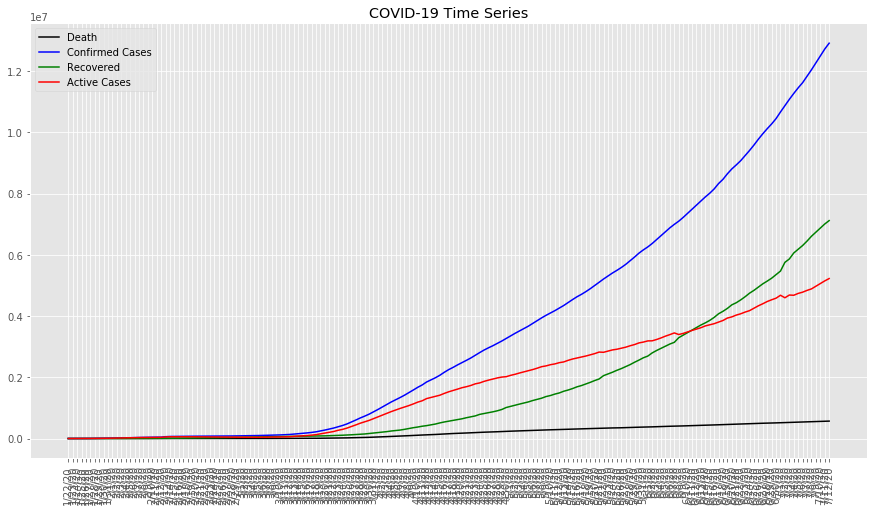

Mortality Rate: 4.41%


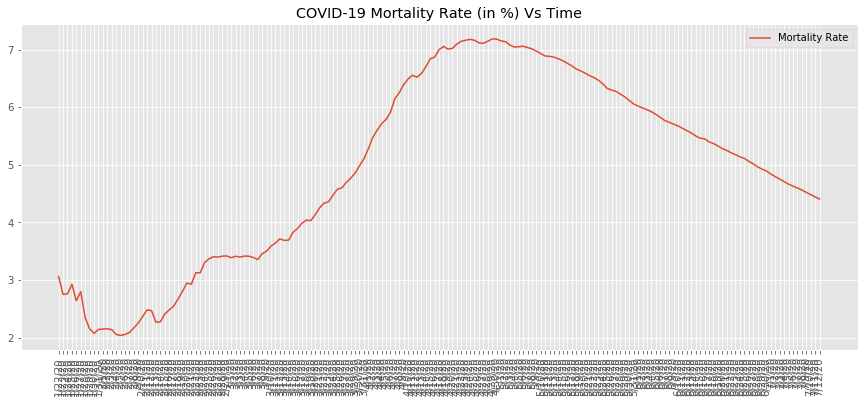

In [9]:
#Latest Position
stats_plotter(except_country(""))

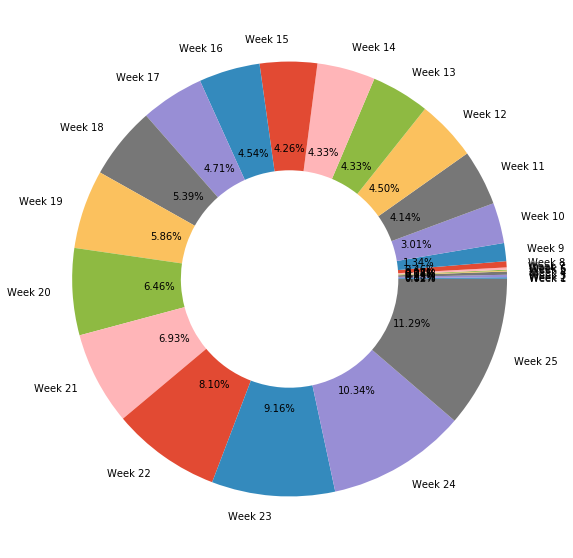

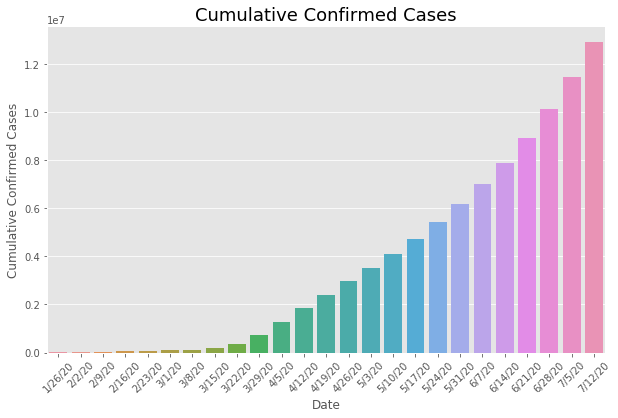

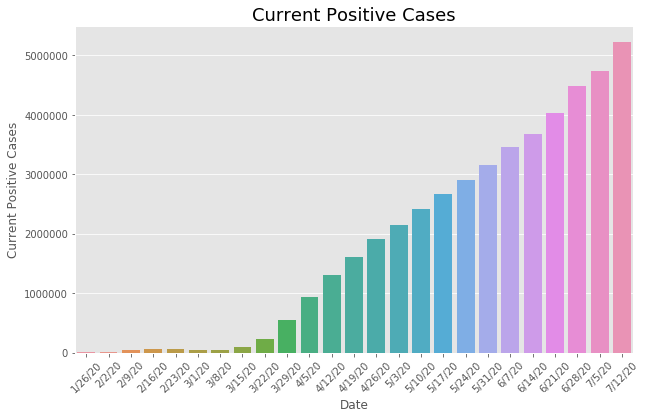

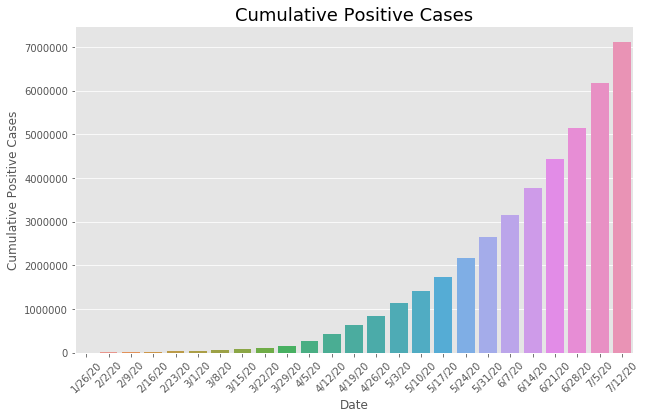

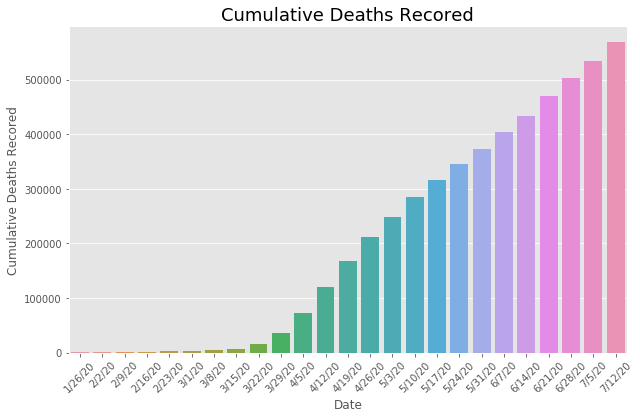

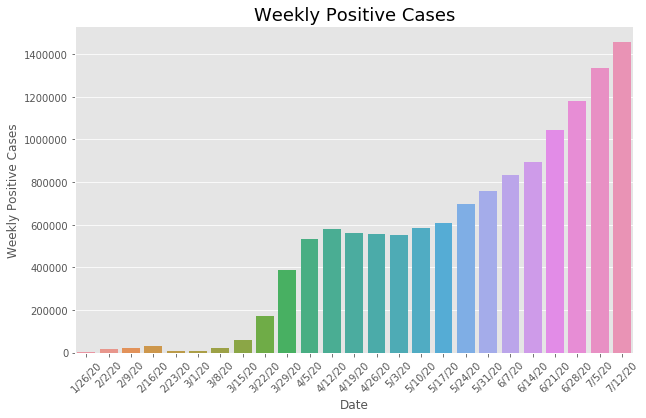

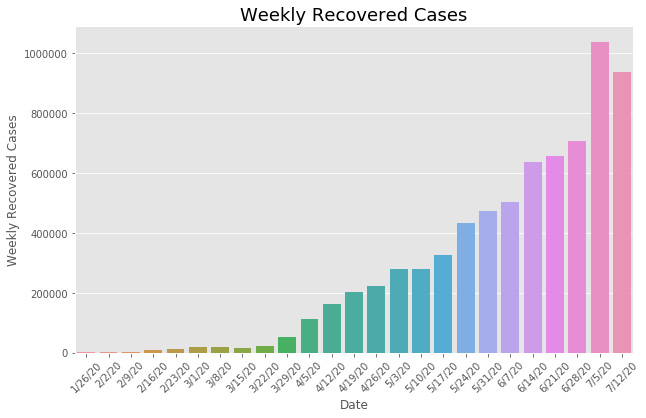

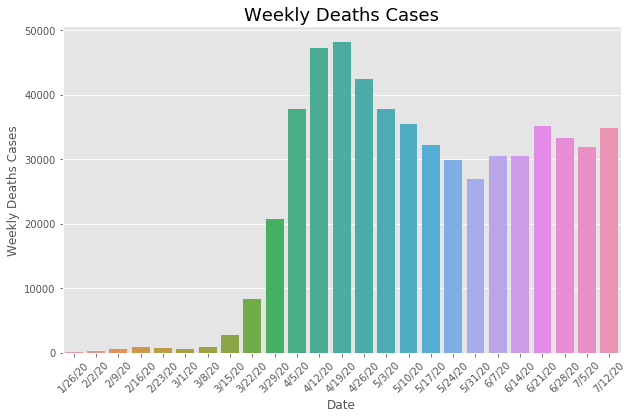

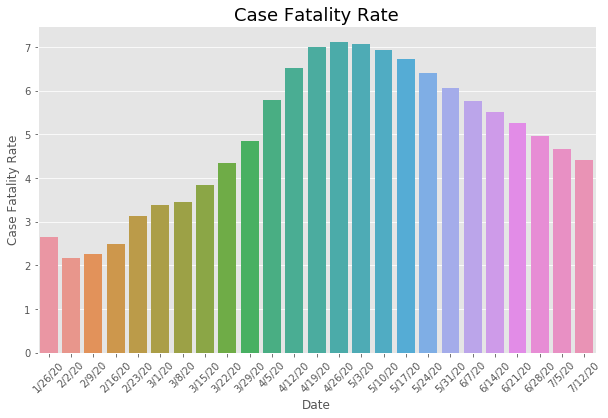

Total New Cases reported in last 7 days : 1458161


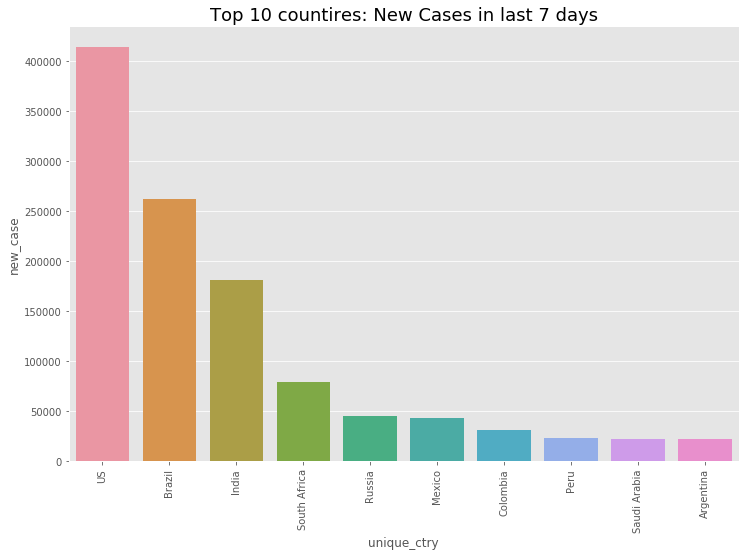

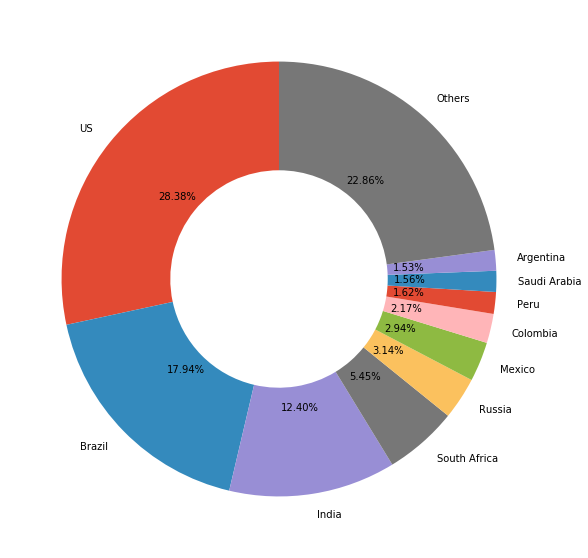

      unique_ctry  new_case
156            US    413818
21         Brazil    261626
71          India    180841
137  South Africa     79492
124        Russia     45753
98         Mexico     42902
33       Colombia     31677
118          Peru     23608
129  Saudi Arabia     22750
6       Argentina     22351
Total Deaths reported in last 7 days : 34848


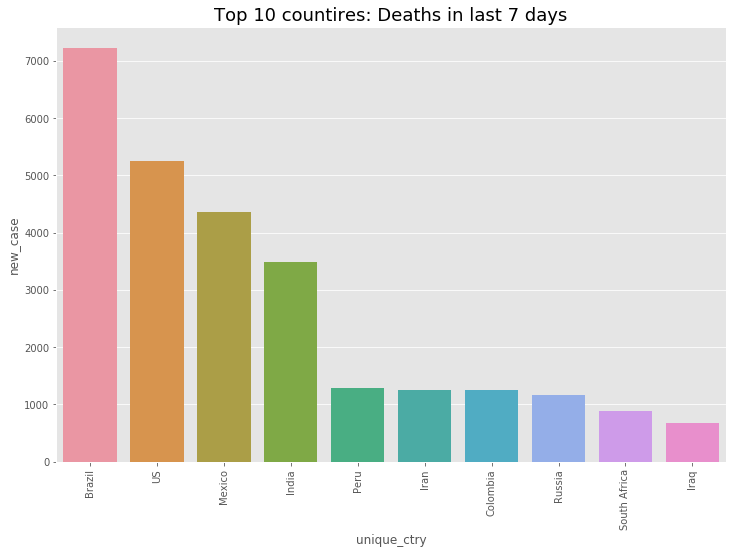

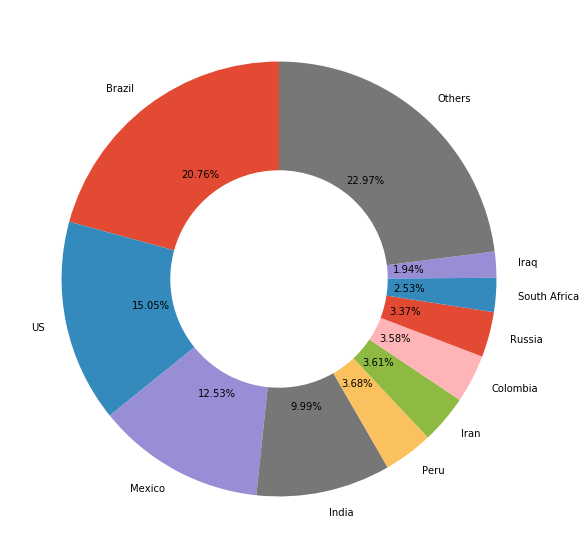

      unique_ctry  new_case
21         Brazil      7233
156            US      5245
98         Mexico      4367
71          India      3481
118          Peru      1281
73           Iran      1258
33       Colombia      1248
124        Russia      1173
137  South Africa       880
74           Iraq       677
Total Recoveries reported in last 7 days : 937951


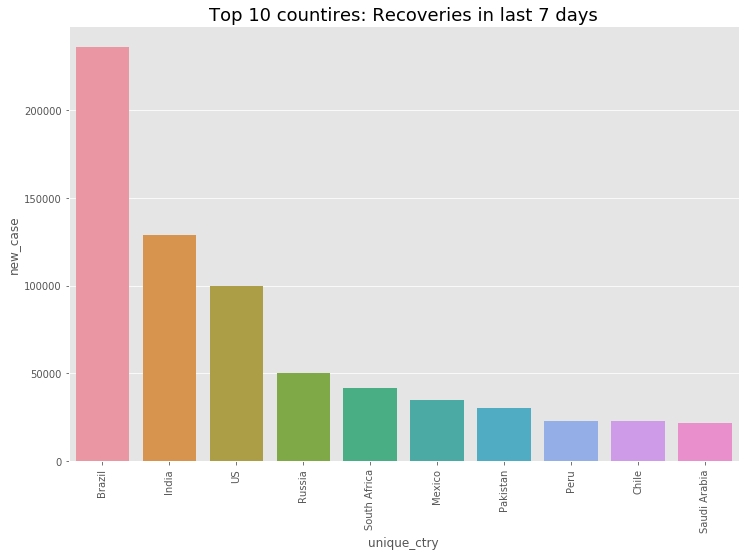

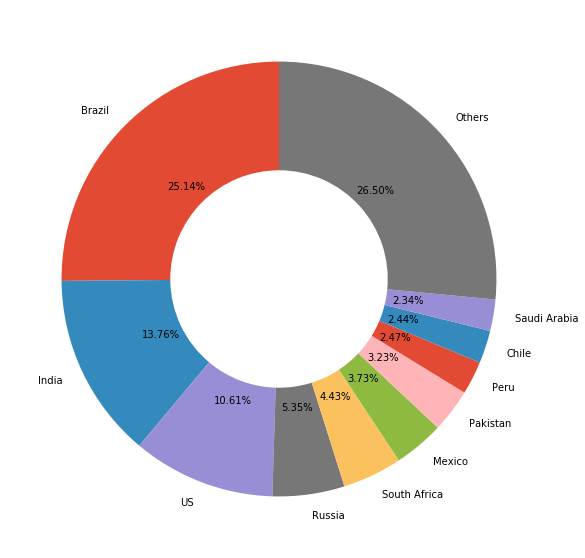

      unique_ctry  new_case
22         Brazil    235798
75          India    129038
166            US     99563
131        Russia     50213
145  South Africa     41559
104        Mexico     34991
121      Pakistan     30268
125          Peru     23154
32          Chile     22863
137  Saudi Arabia     21902


In [10]:
#Last week
weekly_plotter(week_df_maker())
top_ten()

Total New Cases reported Since the beginning : 12910357


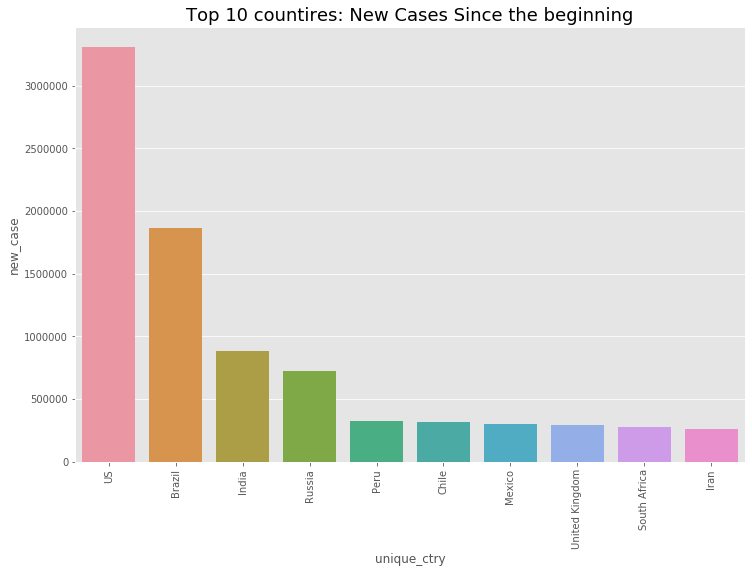

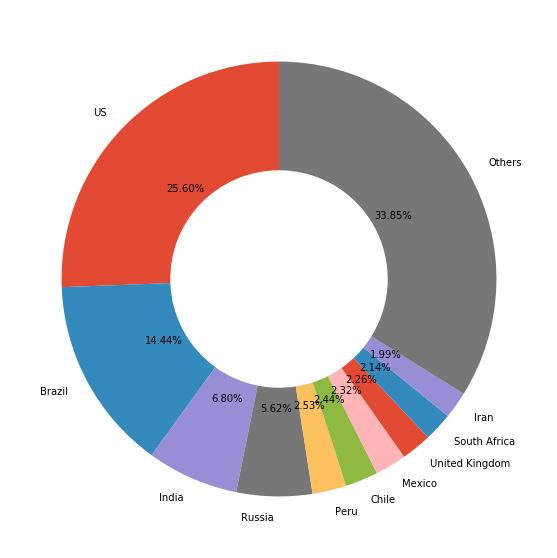

        unique_ctry  new_case
156              US   3304942
21           Brazil   1864681
71            India    878254
124          Russia    726036
118            Peru    326326
31            Chile    315041
98           Mexico    299750
154  United Kingdom    291154
137    South Africa    276242
73             Iran    257303
Total Deaths reported Since the beginning : 569128


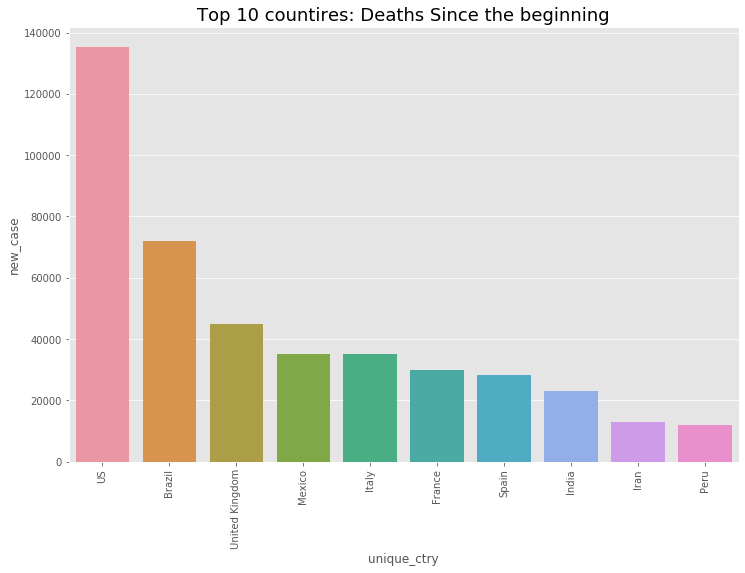

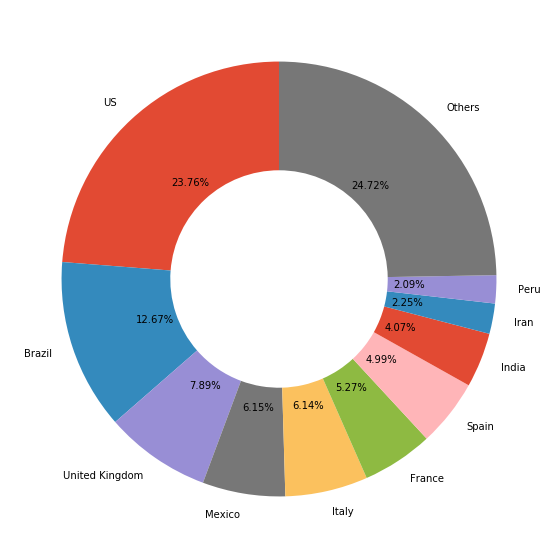

        unique_ctry  new_case
156              US    135205
21           Brazil     72100
154  United Kingdom     44904
98           Mexico     35006
77            Italy     34954
56           France     30007
138           Spain     28403
71            India     23174
73             Iran     12829
118            Peru     11870
Total Recoveries reported Since the beginning : 7116957


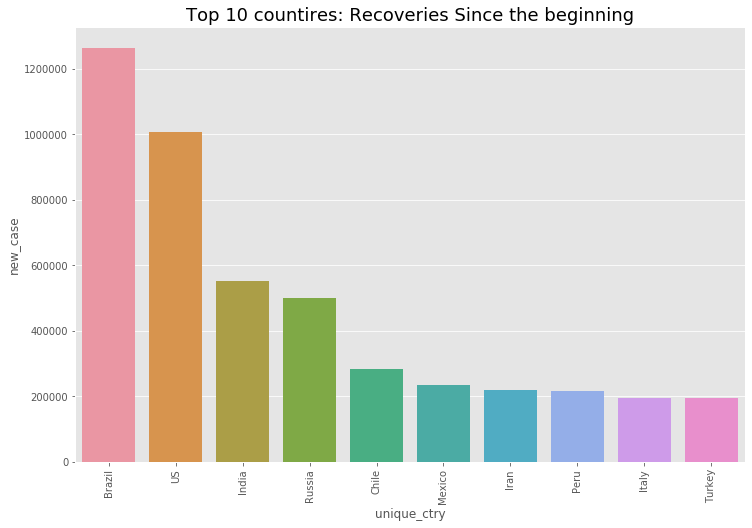

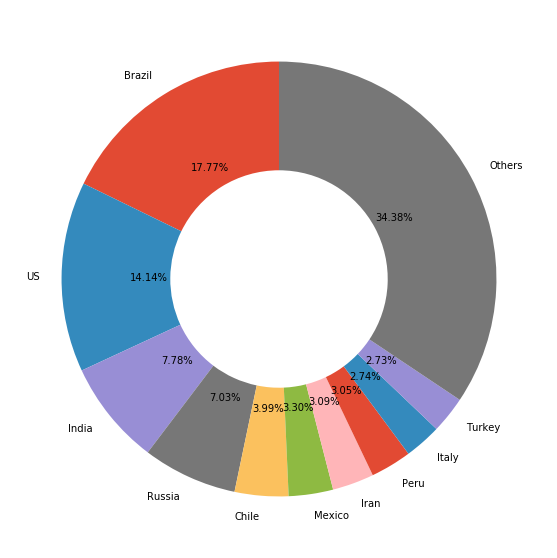

    unique_ctry  new_case
22       Brazil   1264843
166          US   1006326
75        India    553471
131      Russia    500208
32        Chile    283902
104      Mexico    234905
77         Iran    219993
125        Peru    217111
81        Italy    194928
160      Turkey    194515


In [11]:
top_ten(n=0)

In [13]:
df=except_country("")
df.head()

Date  Death  Rec  Conf  MortRate  Active  NewConf
0  1/22/20     17   28   555  3.063063     510      555
1  1/23/20     18   30   654  2.752294     606       99
2  1/24/20     26   36   941  2.763018     879      287
3  1/25/20     42   39  1434  2.928870    1353      493
4  1/26/20     56   52  2118  2.644004    2010      684

In [13]:
def last_n_days(n=7):
    Country=df_death["Country/Region"].unique()

    Conf=[]
    Death=[]
    Rec=[]
    MortRate=[]
    CurrPos=[]

    for i in Country:
        if n==0:
            conf=df_conf[df_conf["Country/Region"]==i].iloc[:,-1,].sum()
            death=df_death[df_death["Country/Region"]==i].iloc[:,-1,].sum()
            rec=df_rec[df_rec["Country/Region"]==i].iloc[:,-1,].sum()
        else:
            conf=df_conf[df_conf["Country/Region"]==i].iloc[:,-1,].sum()-df_conf[df_conf["Country/Region"]==i].iloc[:,-1-n,].sum()
            death=df_death[df_death["Country/Region"]==i].iloc[:,-1,].sum()-df_death[df_death["Country/Region"]==i].iloc[:,-1-n,].sum()
            rec=df_rec[df_rec["Country/Region"]==i].iloc[:,-1,].sum()-df_rec[df_rec["Country/Region"]==i].iloc[:,-1-n,].sum()

        Conf.append(conf)  
        Death.append(death)
        Rec.append(rec)
        MortRate.append(round(death*100/conf,2))
        CurrPos.append(conf-death-rec)
    dict_last={"Country":Country, "Conf":Conf, "Death":Death, "Rec":Rec,"CurrPos":CurrPos,"MortRate":MortRate}
    df_last=pd.DataFrame(dict_last)
    df_last.sort_values("Conf", ascending=False, inplace=True)
    return df_last

In [14]:
df=last_n_days()
df.to_csv("12_july_week.csv", index=False)

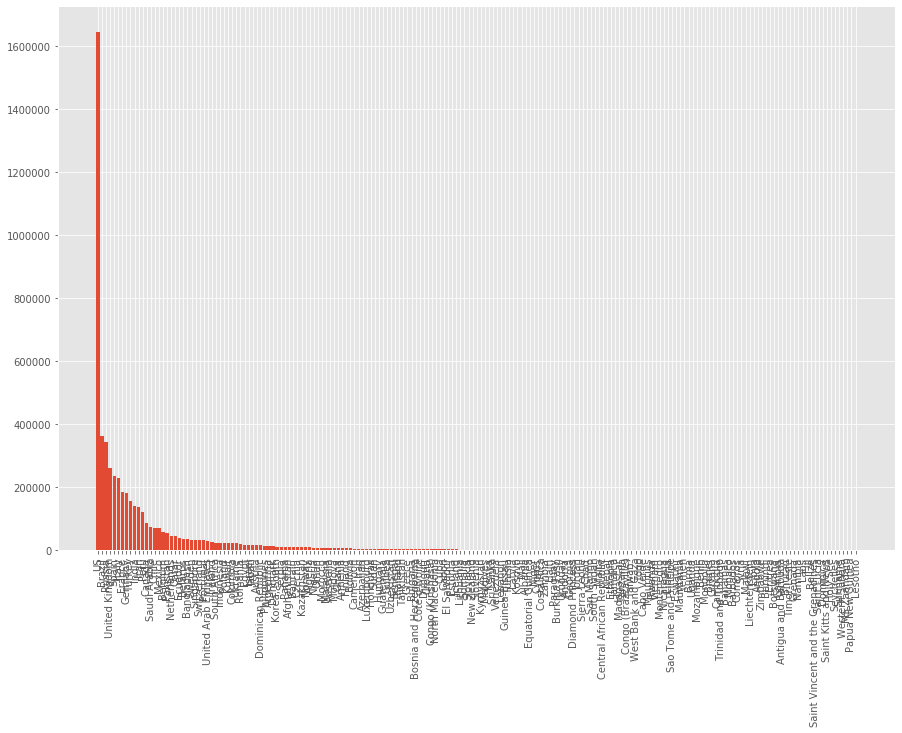

In [21]:
df_oc=df_last[df_last.Country!="China"].sort_values("Conf", ascending=False)
plt.figure(figsize=(15,10))
plt.bar(df_oc.Country,df_oc.Conf)
plt.xticks(rotation=90)
plt.show()

In [22]:
death_oc=df_oc.Death.sum()
conf_oc=df_oc.Conf.sum()
mort_rate_oc=round(death_oc*100/conf_oc,2)
mort_rate_chn=df_last.MortRate[df_last.Country=="China"]
print("Mortality rate in China= ",mort_rate_chn)
print("Mortality rate outside China= ",mort_rate_oc)

Mortality rate in China=  32    5.52
Name: MortRate, dtype: float64
Mortality rate outside China=  6.39


In [23]:
df_last.sort_values("MortRate", ascending=False)[df_last.Conf>8000]

Country     Conf  Death     Rec  CurrPos  MortRate
16                Belgium    57092   9280   15272    32540     16.25
56                 France   182709  28370   64735    89604     15.53
77                  Italy   229858  32785  140479    56594     14.26
154        United Kingdom   260916  36875    1151   222890     14.13
106           Netherlands    45437   5841     174    39422     12.86
138                 Spain   235772  28752  150376    56644     12.19
142                Sweden    33459   3998    4971    24490     11.95
98                 Mexico    68620   7394   46979    14247     10.78
46                Ecuador    36756   3108    3560    30088      8.46
28                 Canada    86106   6534   43998    35574      7.59
2                 Algeria     8306    600    4784     2922      7.22
123               Romania    18070   1185   11399     5486      6.56
75                Ireland    24639   1608   21060     1971      6.53
21                 Brazil   363211  22666  149911   190634      6.24
143           Switzerland    30736   1906   28100      730      6.20
119           Philippines    14035    868    3249     9918      6.18
72              Indonesia    22271   1372    5402    15497      6.16
156                    US  1643246  97720  366736  1178790      5.95
32                  China    84095   4638   79343      114      5.52
73                   Iran   135701   7417  105801    22483      5.47
79                  Japan    16550    820   13413     2317      4.95
43                Denmark    11559    562   10098      899      4.86
120                Poland    21326    996    9194    11136      4.67
60                Germany   180328   8283  160281    11764      4.59
47                  Egypt    17265    764    4807    11694      4.43
121              Portugal    30623   1316   17549    11758      4.30
9                 Austria    16503    640   15063      800      3.88
6               Argentina    12076    452    3732     7892      3.74
42                Czechia     8955    315    6078     2562      3.52
33               Colombia    21175    727    5016    15432      3.43
45     Dominican Republic    14801    458    8133     6210      3.09
152               Ukraine    20986    617    7108    13261      2.94
71                  India   138536   4024   57692    76820      2.90
118                  Peru   119959   3456   49795    66708      2.88
112                Norway     8352    235    7727      390      2.81
115                Panama    10926    306    6279     4341      2.80
150                Turkey   156827   4340  118694    33793      2.77
83           Korea, South    11206    267   10226      713      2.38
131                Serbia    11159    238    5857     5064      2.13
114              Pakistan    54601   1133   17198    36270      2.08
0             Afghanistan    10582    218    1075     9289      2.06
137          South Africa    22583    429   11100    11054      1.90
76                 Israel    16717    279   14153     2285      1.67
13             Bangladesh    33610    480    6901    26229      1.43
31                  Chile    69102    718   28148    40236      1.04
124                Russia   344481   3541  113299   227641      1.03
153  United Arab Emirates    29485    245   15056    14184      0.83
84                 Kuwait    21302    156    6117    15029      0.73
15                Belarus    36198    199   14155    21844      0.55
129          Saudi Arabia    72560    390   43520    28650      0.54
81             Kazakhstan     8531     35    4352     4144      0.41
12                Bahrain     9138     14    4587     4537      0.15
133             Singapore    31616     23   14876    16717      0.07
122                 Qatar    43714     23    9170    34521      0.05

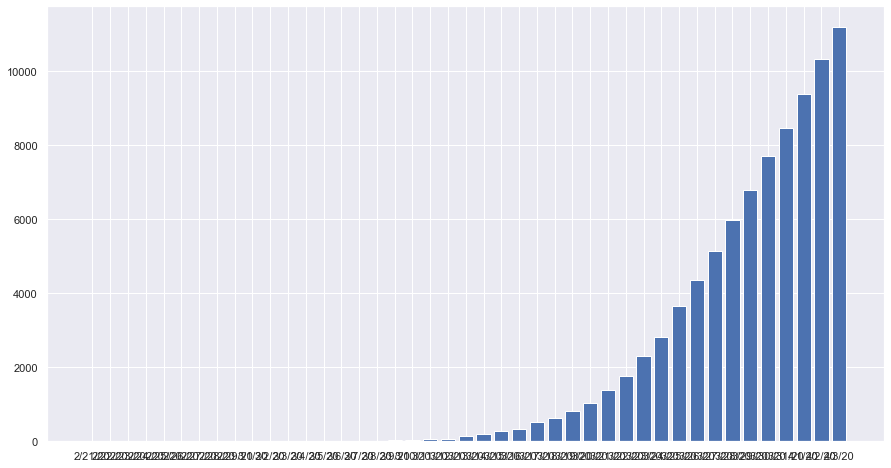

Date  Death    Rec    Conf  MortRate  NewConf
30  2/21/20      0      2       2  0.000000        0
31  2/22/20      0      2       2  0.000000        0
32  2/23/20      0      2       2  0.000000        0
33  2/24/20      0      2       2  0.000000        0
34  2/25/20      0      2       6  0.000000        4
35  2/26/20      0      2      13  0.000000        7
36  2/27/20      0      2      15  0.000000        2
37  2/28/20      0      2      32  0.000000       17
38  2/29/20      0      2      45  0.000000       13
39   3/1/20      0      2      84  0.000000       39
40   3/2/20      0      2     120  0.000000       36
41   3/3/20      1      2     165  0.606061       45
42   3/4/20      2      2     222  0.900901       57
43   3/5/20      3      2     259  1.158301       37
44   3/6/20      5      2     400  1.250000      141
45   3/7/20     10     30     500  2.000000      100
46   3/8/20     17     30     673  2.526003      173
47   3/9/20     28     32    1073  2.609506      400
48  3/10/20     35     32    1695  2.064897      622
49  3/11/20     54    183    2277  2.371542      582
50  3/12/20     55    183    2277  2.415459        0
51  3/13/20    133    193    5232  2.542049     2955
52  3/14/20    195    517    6391  3.051166     1159
53  3/15/20    289    517    7798  3.706078     1407
54  3/16/20    342    530    9942  3.439952     2144
55  3/17/20    533   1028   11748  4.536942     1806
56  3/18/20    623   1081   13910  4.478792     2162
57  3/19/20    830   1107   17963  4.620609     4053
58  3/20/20   1043   1588   20410  5.110240     2447
59  3/21/20   1375   2125   25374  5.418933     4964
60  3/22/20   1772   2575   28768  6.159622     3394
61  3/23/20   2311   2575   35136  6.577300     6368
62  3/24/20   2808   3794   39885  7.040241     4749
63  3/25/20   3647   5367   49515  7.365445     9630
64  3/26/20   4365   7015   57786  7.553733     8271
65  3/27/20   5138   9357   65719  7.818135     7933
66  3/28/20   5982  12285   73235  8.168226     7516
67  3/29/20   6803  14709   80110  8.492073     6875
68  3/30/20   7716  16780   87956  8.772568     7846
69  3/31/20   8464  19259   95923  8.823744     7967
70   4/1/20   9387  22647  104118  9.015732     8195
71   4/2/20  10348  26743  112065  9.233927     7947
72   4/3/20  11198  30513  119199  9.394374     7134

In [24]:
ts_italy=only_country("Spain").iloc[30:,:]
plt.figure(figsize=(15,8))
plt.bar(ts_italy.Date, ts_italy.Death)
plt.show()
ts_italy

In [21]:
europe=['Germany', 'Finland','Italy', 'Sweden',
       'Spain', 'Belgium','Croatia',
       'Switzerland', 'Austria', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania','Ireland', 'Luxembourg',
       'Monaco','Portugal', 'Andorra', 'Latvia','Ukraine', 'Hungary', 'Liechtenstein', 'Poland','Bosnia and Herzegovina', 'Slovenia','Serbia',
       'Slovakia','Malta','Bulgaria','Cyprus','Holy See','France','Denmark', 'Czechia','Netherlands','Moldova','United Kingdom','Kosovo','Montenegro']
Conf_eur=[]

for ctry in europe:
    Conf_eur.append(only_country(ctry).iloc[:,-1].sum())
dict_eur={"Country":europe,"Conf":Conf_eur}
df_eur=pd.DataFrame(dict_eur)
df_eur.Conf.sum()

1048144

Total Confirmed Cases : 5407613
Total Recovered Patients : 2168563
Total Deaths : 345059


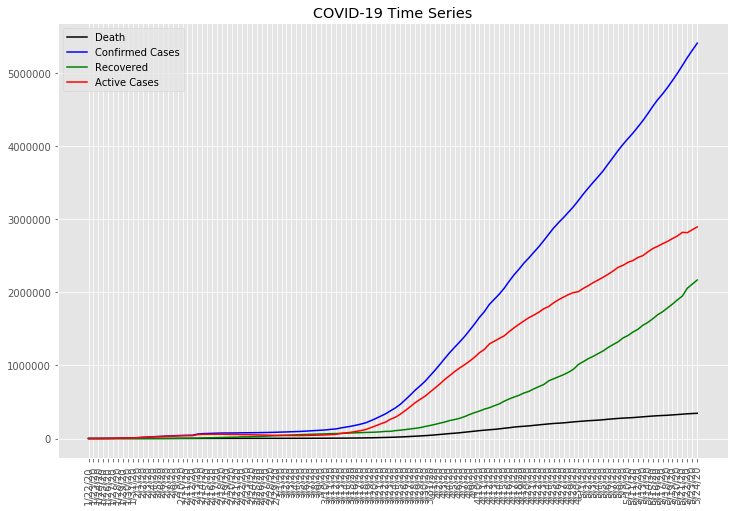

Mortality Rate: 6.38%


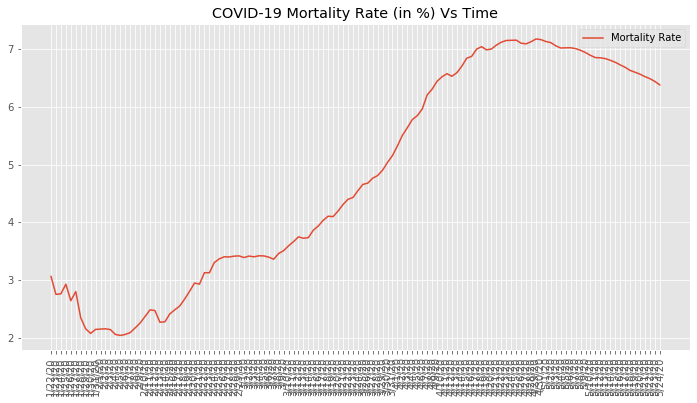

In [24]:
# Global data 
df_all=except_country("")
stats_plotter(df_all)

Total Confirmed Cases : 84095
Total Recovered Patients : 79343
Total Deaths : 4638


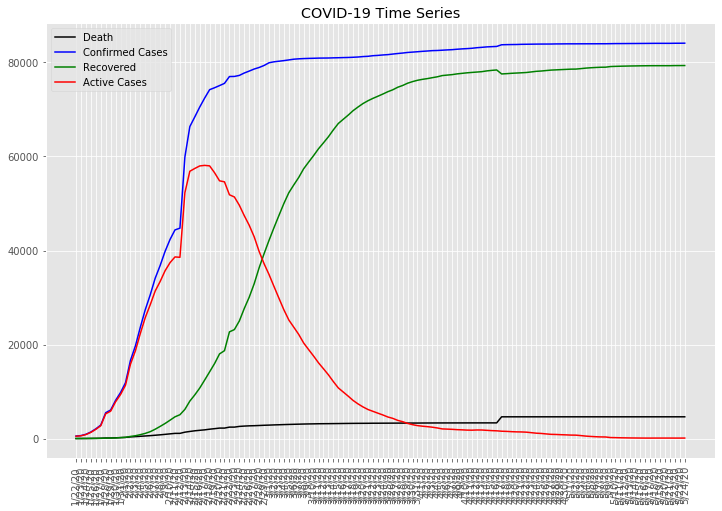

Mortality Rate: 5.52%


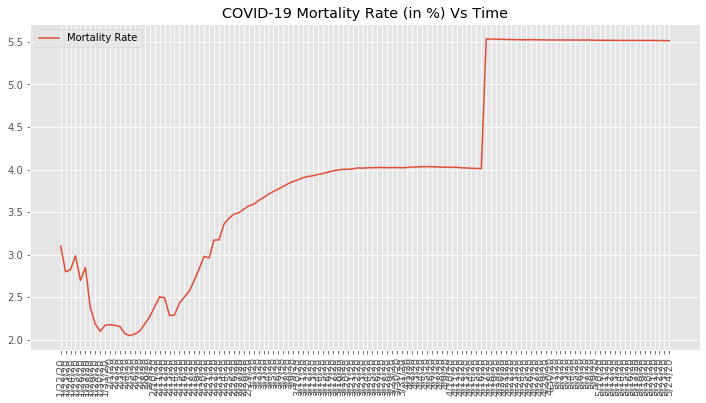

In [25]:
stats_plotter(only_country("China"))

In [26]:
only_country("China").tail(10)

Date  Death    Rec   Conf  MortRate  Active  NewConf
114  5/15/20   4637  79281  84038  5.517742     120        9
115  5/16/20   4638  79293  84044  5.518538     113        6
116  5/17/20   4638  79306  84054  5.517881     110       10
117  5/18/20   4638  79310  84063  5.517291     115        9
118  5/19/20   4638  79310  84063  5.517291     115        0
119  5/20/20   4638  79310  84063  5.517291     115        0
120  5/21/20   4638  79310  84063  5.517291     115        0
121  5/22/20   4638  79332  84081  5.516109     111       18
122  5/23/20   4638  79335  84084  5.515913     111        3
123  5/24/20   4638  79343  84095  5.515191     114       11

In [27]:
def plotter_top_ctry(ctry_list=["Italy","US"],n=0, wuhan=False, total=False):  
    if n==0:
        n=only_country("Italy").shape[0]
        
    sns.set(style='dark')
    plt.figure(figsize=(18,10))
    plt.title("COVID-19 Total Confirmed Time Series", fontsize=18)
    for ctry in ctry_list:
        df_oc=only_country(ctry).iloc[-n:,:]
        plt.plot(df_oc.Date,df_oc.Conf, label=str(ctry))
    
    if wuhan==True:
        df_wuhan=only_state("Hubei").iloc[-n:,:]
        plt.plot(df_wuhan.Date,df_wuhan.Conf, label="Hubei")
        
    if total==True:
        df_total=except_country("").iloc[-n:,:]
        plt.plot(df_total.Date,df_total.Conf,'k--', label="Global")
        
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(18,10))
    plt.title("COVID-19 New Confirmed Time Series", fontsize=18)
    for ctry in ctry_list:
        df_oc=only_country(ctry).iloc[-n:,:]
        plt.plot(df_oc.Date,df_oc.NewConf, label=str(ctry))
        
    if wuhan==True:
        df_wuhan=only_state("Hubei").iloc[-n:,:]
        plt.plot(df_wuhan.Date,df_wuhan.NewConf, label="Hubei")
        
    if total==True:
        df_total=except_country("").iloc[-n:,:]
        plt.plot(df_total.Date,df_total.NewConf,'k--', label="Global")
        
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(18,10))
    plt.title("COVID-19 Mortality Rate Time Series", fontsize=18)
    for ctry in ctry_list:
        df_oc=only_country(ctry).iloc[-n:,:]
        plt.plot(df_oc.Date,df_oc.MortRate, label=str(ctry))
        
    if wuhan==True:
        df_wuhan=only_state("Hubei").iloc[-n:,:]
        plt.plot(df_wuhan.Date,df_wuhan.MortRate, label="Hubei")
        
    if total in [True,False]:
        df_total=except_country("").iloc[-n:,:]
        plt.plot(df_total.Date,df_total.MortRate,'k--', label="Global")
        
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(18,10))
    plt.title("COVID-19 Death Time Series", fontsize=18)
    for ctry in ctry_list:
        df_oc=only_country(ctry).iloc[-n:,:]
        plt.plot(df_oc.Date,df_oc.Death, label=str(ctry))
        
    if wuhan==True:
        df_wuhan=only_state("Hubei").iloc[-n:,:]
        plt.plot(df_wuhan.Date,df_wuhan.Death, label="Hubei")
        
    if total==True:
        df_total=except_country("").iloc[-n:,:]
        plt.plot(df_total.Date,df_total.Death,'k--', label="Global")
        
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(18,10))
    plt.title("COVID-19 Recovered Cases Time Series", fontsize=18)
    for ctry in ctry_list:
        df_oc=only_country(ctry).iloc[-n:,:]
        plt.plot(df_oc.Date,df_oc.Rec, label=str(ctry))
        
    if wuhan==True:
        df_wuhan=only_state("Hubei").iloc[-n:,:]
        plt.plot(df_wuhan.Date,df_wuhan.Rec, label="Hubei")
        
    if total==True:
        df_total=except_country("").iloc[-n:,:]
        plt.plot(df_total.Date,df_total.Rec,'k--', label="Global")
        
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(18,10))
    plt.title("COVID-19 Current Positive Time Series", fontsize=18)
    for ctry in ctry_list:
        df_oc=only_country(ctry).iloc[-n:,:]
        df_oc["CurrPos"]=df_oc.Conf-df_oc.Death-df_oc.Rec
        plt.plot(df_oc.Date,df_oc.CurrPos, label=str(ctry))
        
    if wuhan==True:
        df_wuhan=only_state("Hubei").iloc[-n:,:]
        df_wuhan["CurrPos"]=df_wuhan.Conf-df_wuhan.Death-df_wuhan.Rec
        plt.plot(df_wuhan.Date,df_wuhan.CurrPos, label="Hubei")
        
    if total==True:
        df_total=except_country("").iloc[-n:,:]
        df_total["CurrPos"]=df_total.Conf-df_total.Death-df_total.Rec
        plt.plot(df_total.Date,df_total.CurrPos,'k--', label="Global")
        
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

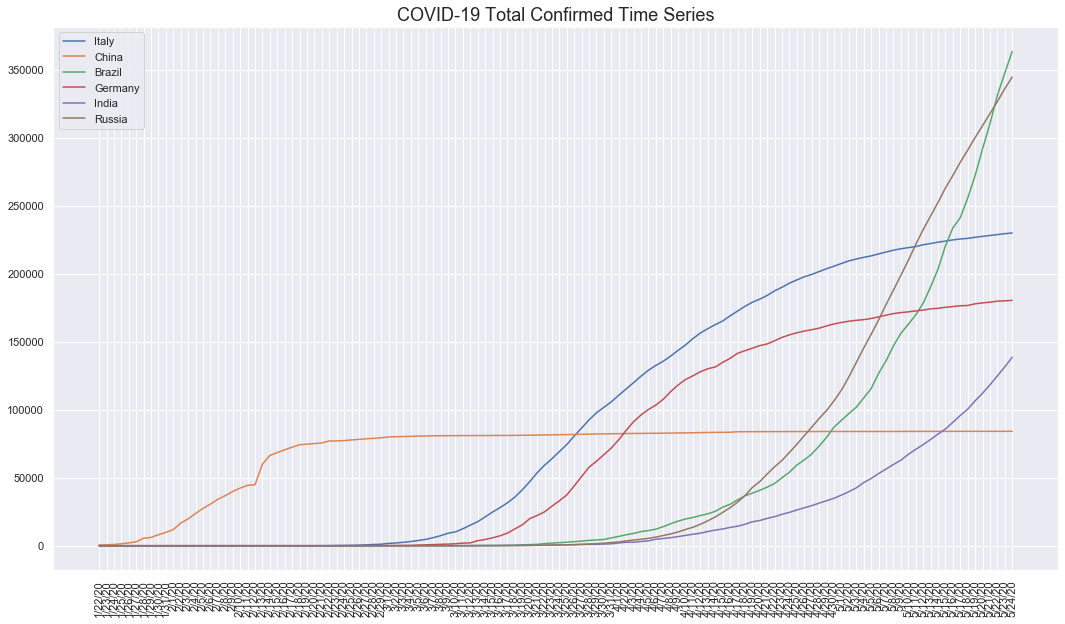

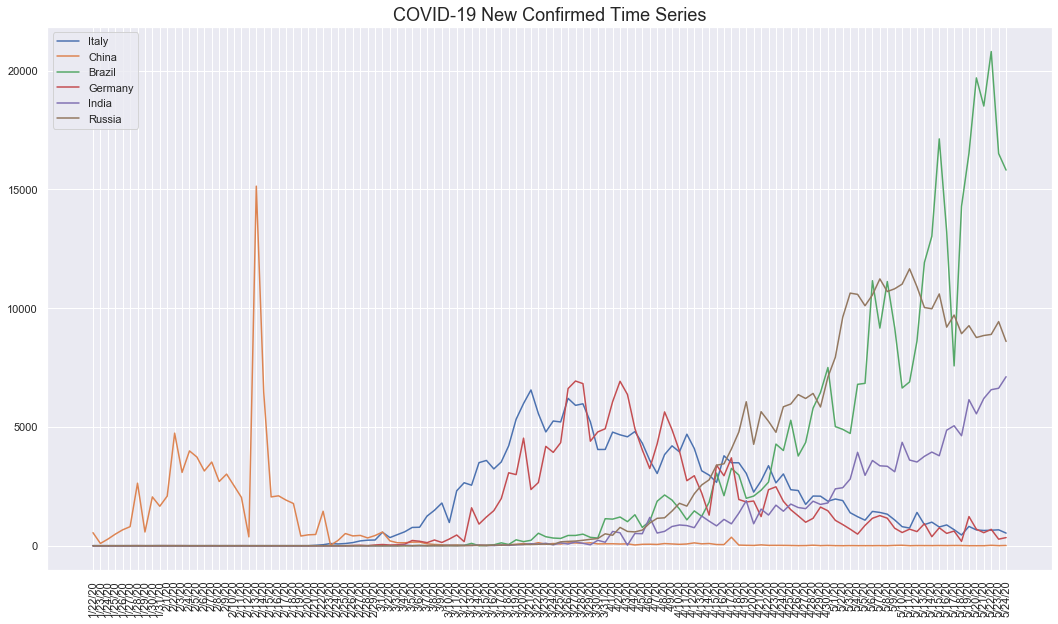

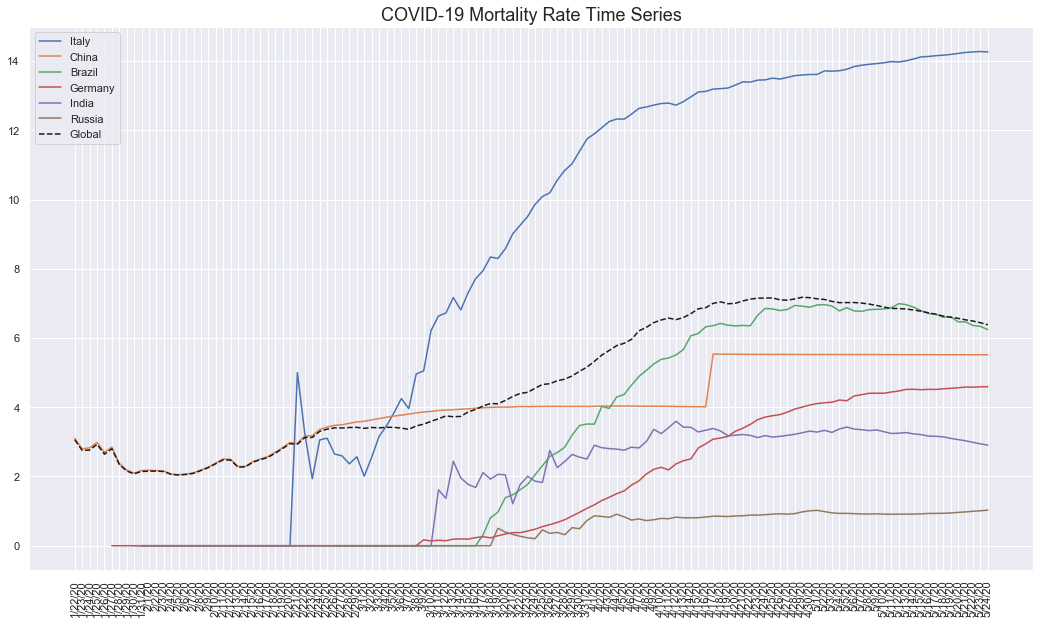

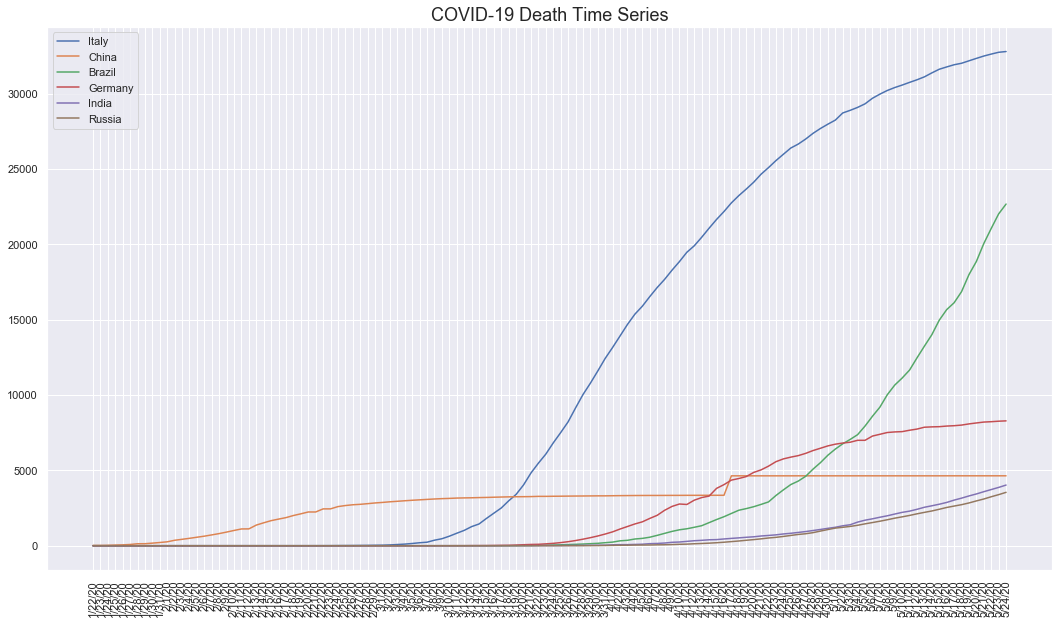

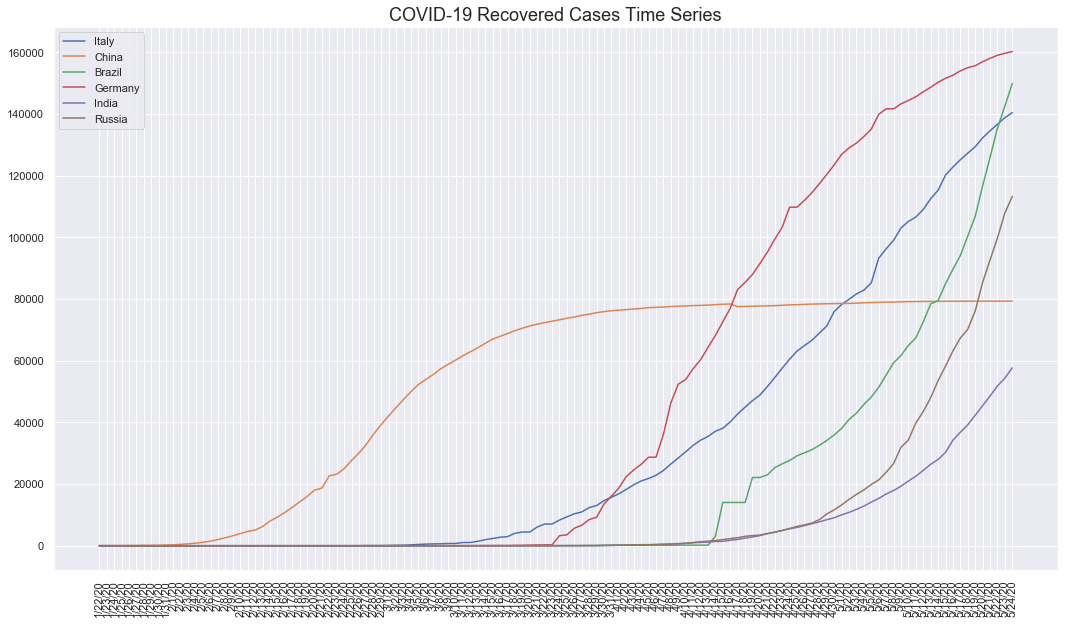

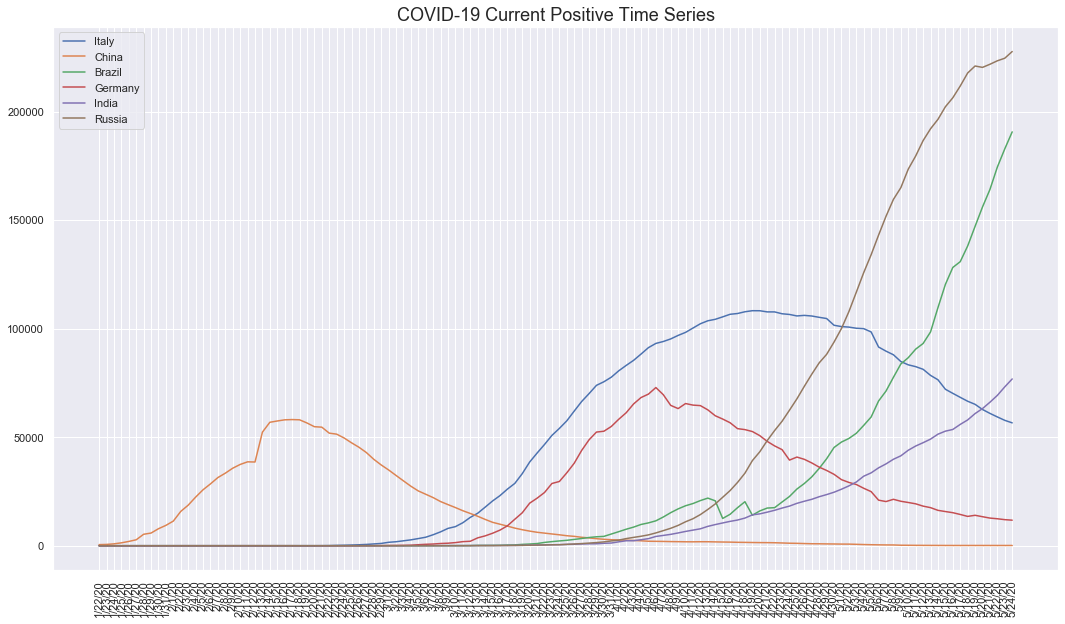

In [32]:
ctry_list=["Italy","China","Brazil","Germany","India","Russia"]
plotter_top_ctry(ctry_list,n=0, wuhan=False)

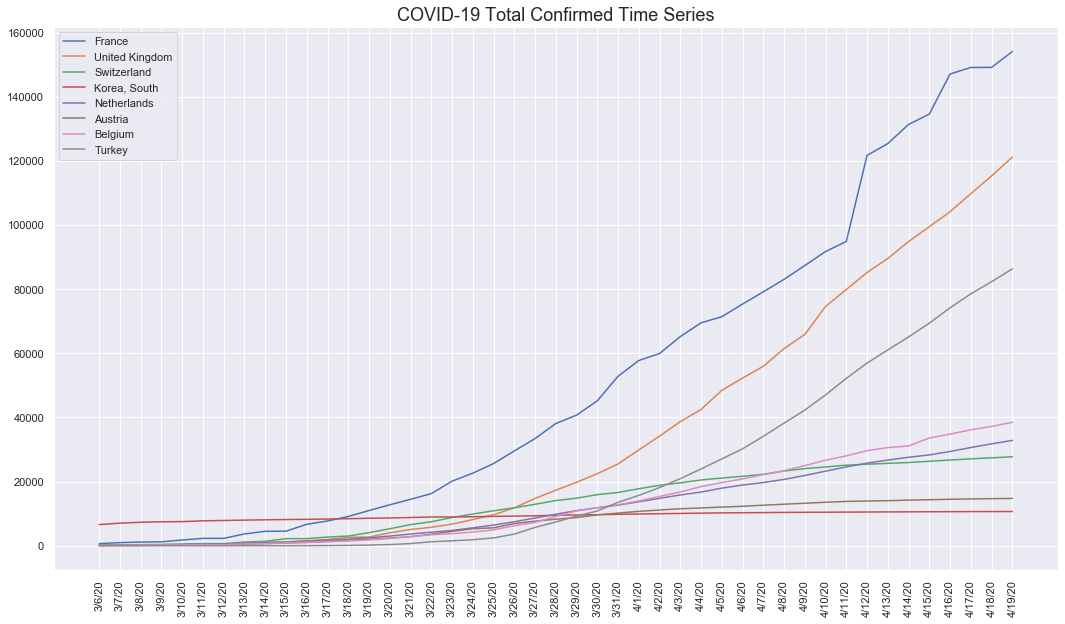

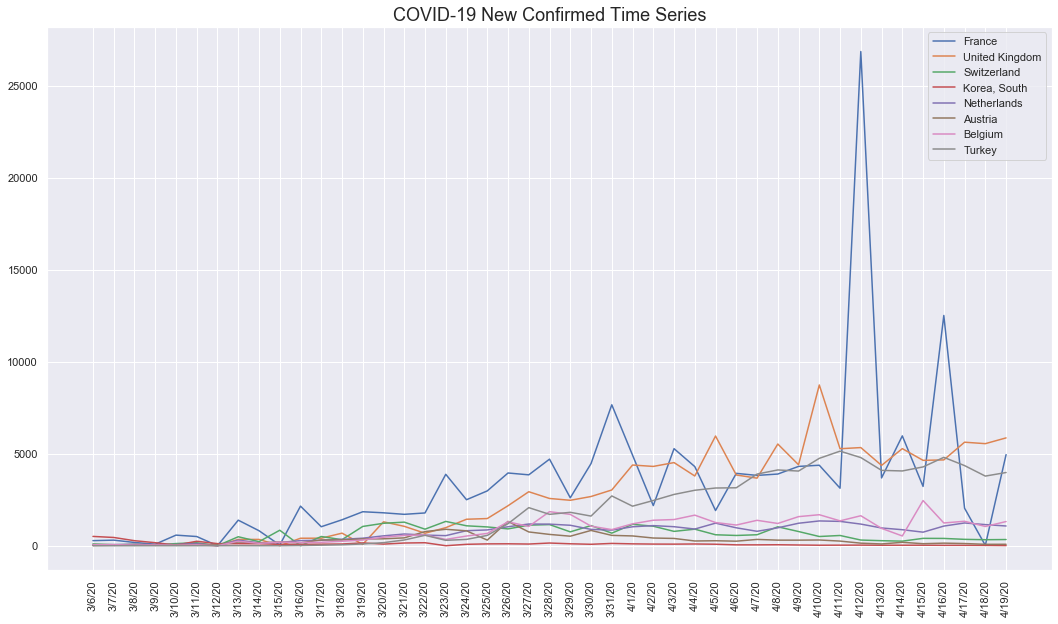

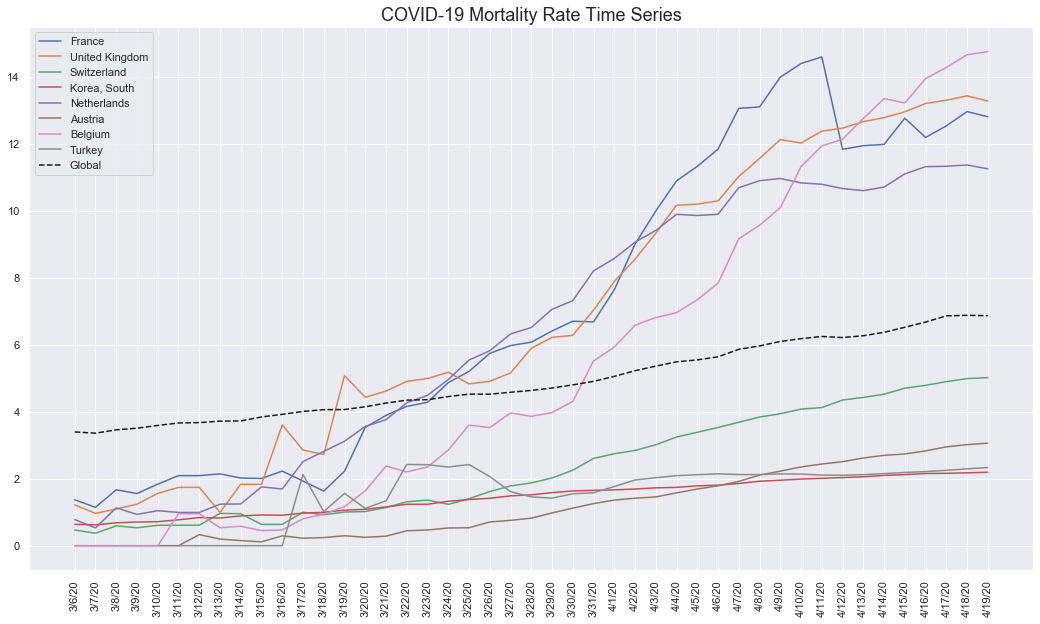

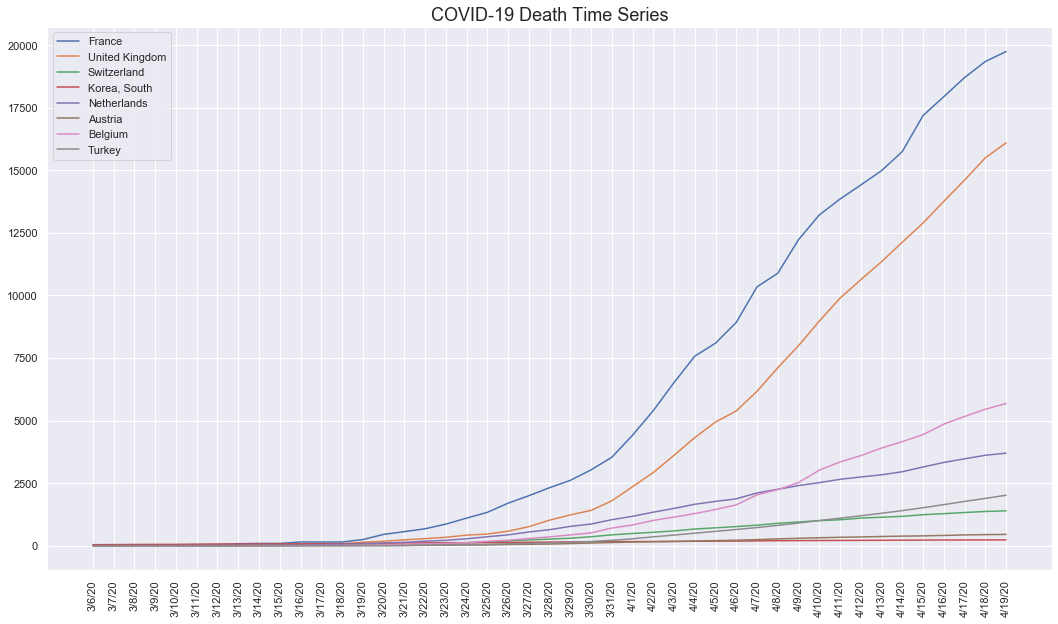

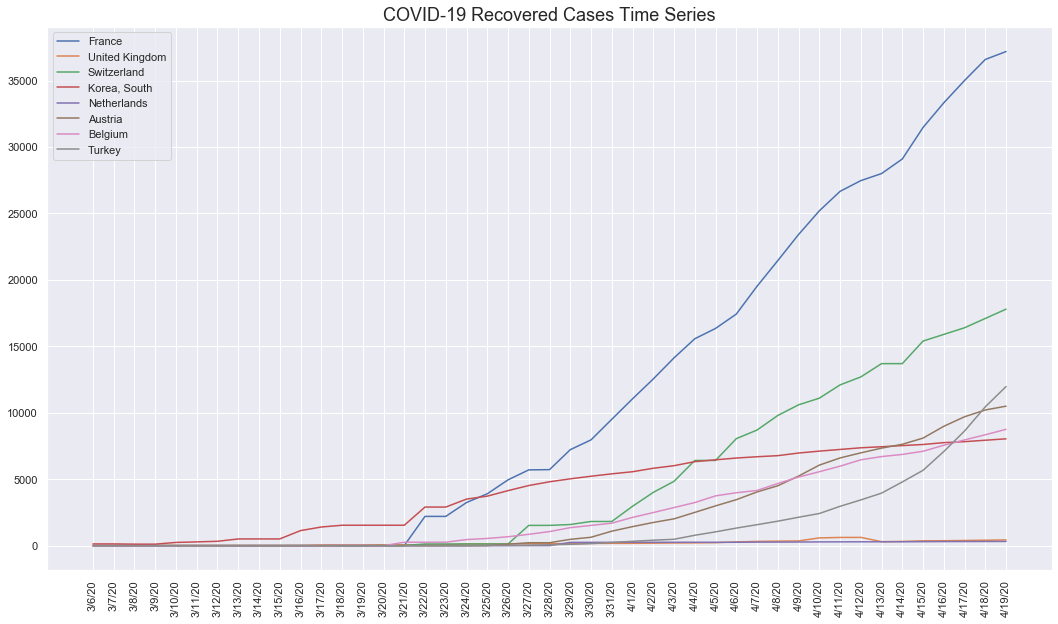

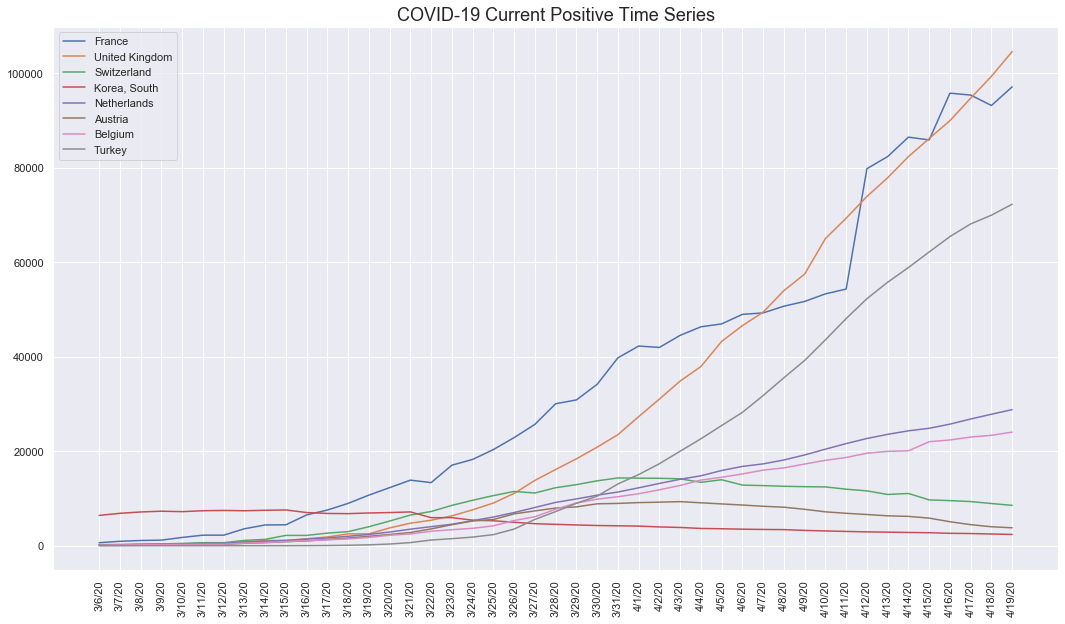

In [39]:
plotter_top_ctry(["France","United Kingdom","Switzerland","Korea, South","Netherlands","Austria","Belgium","Turkey"],n=45)

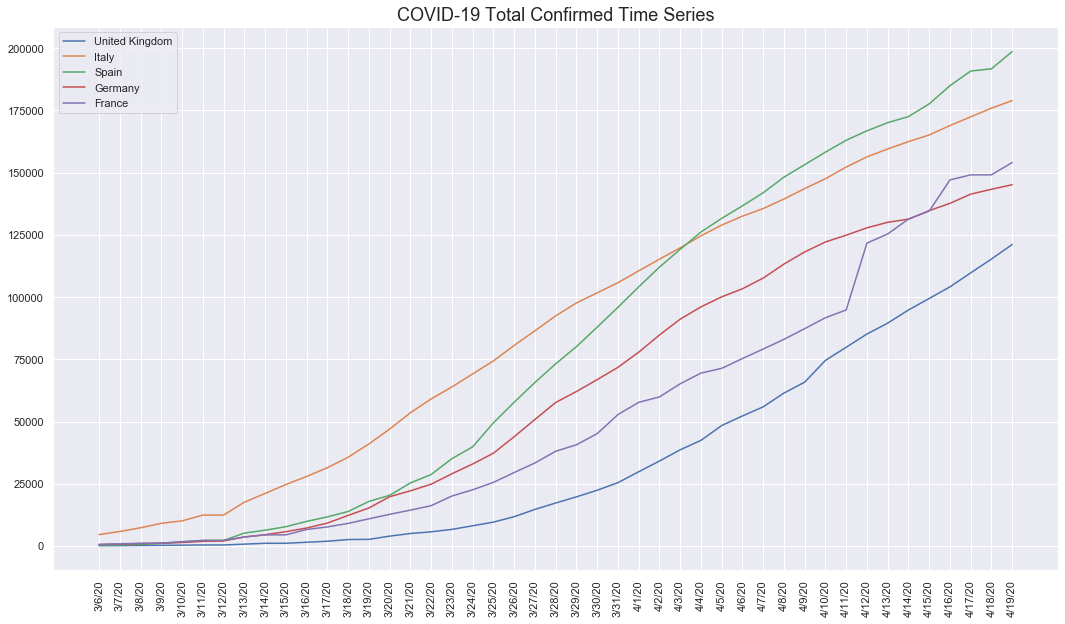

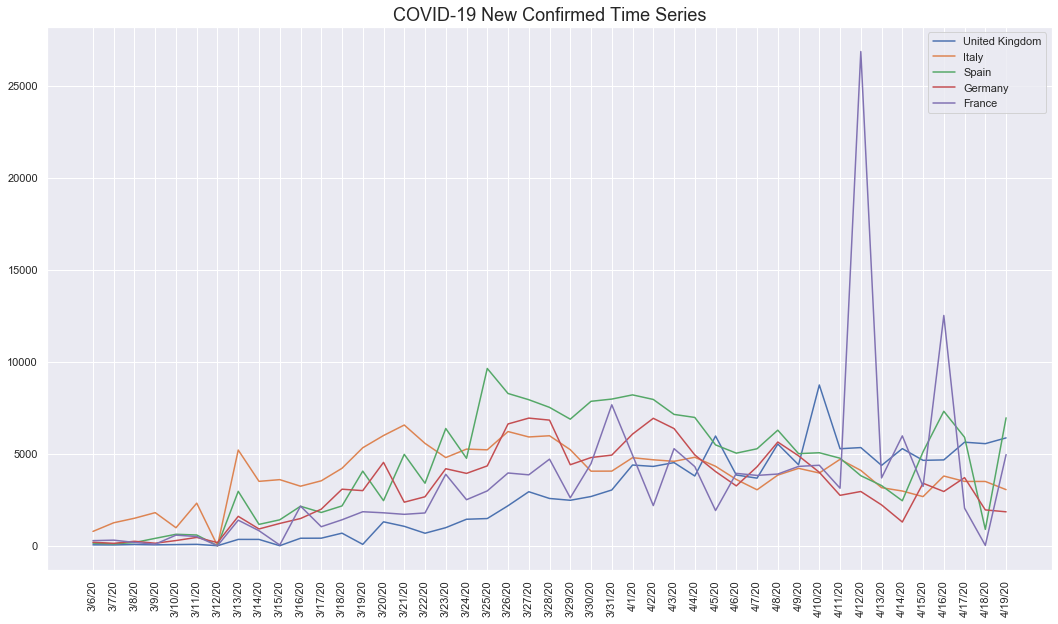

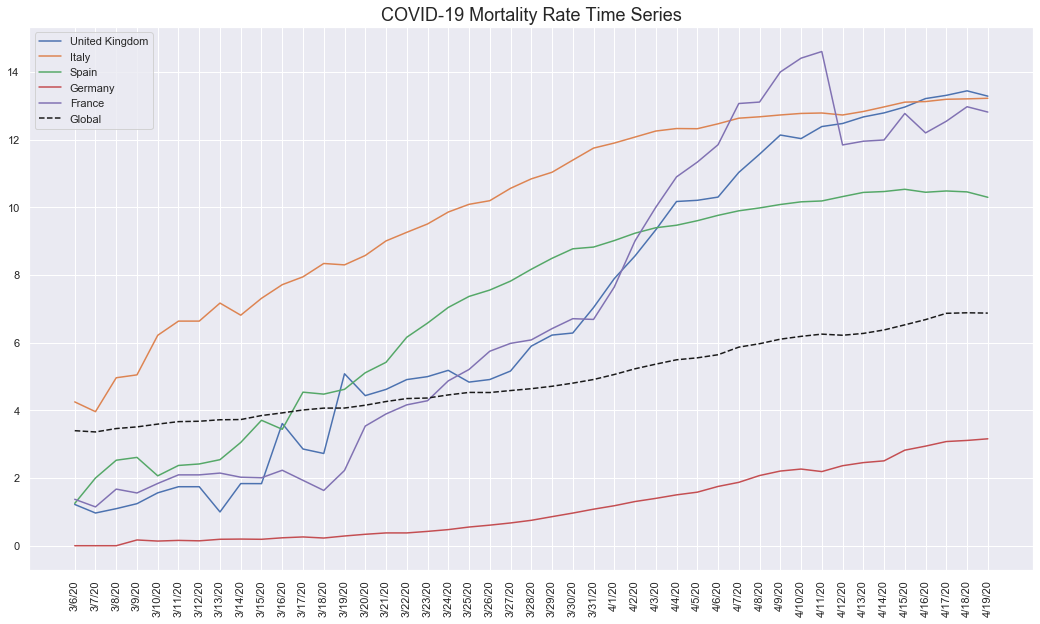

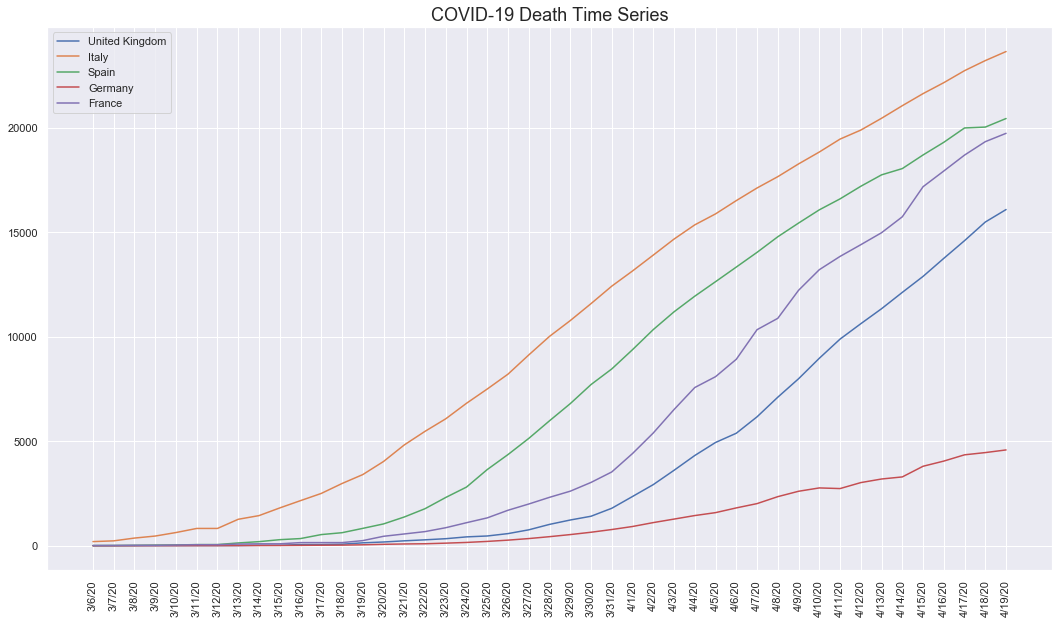

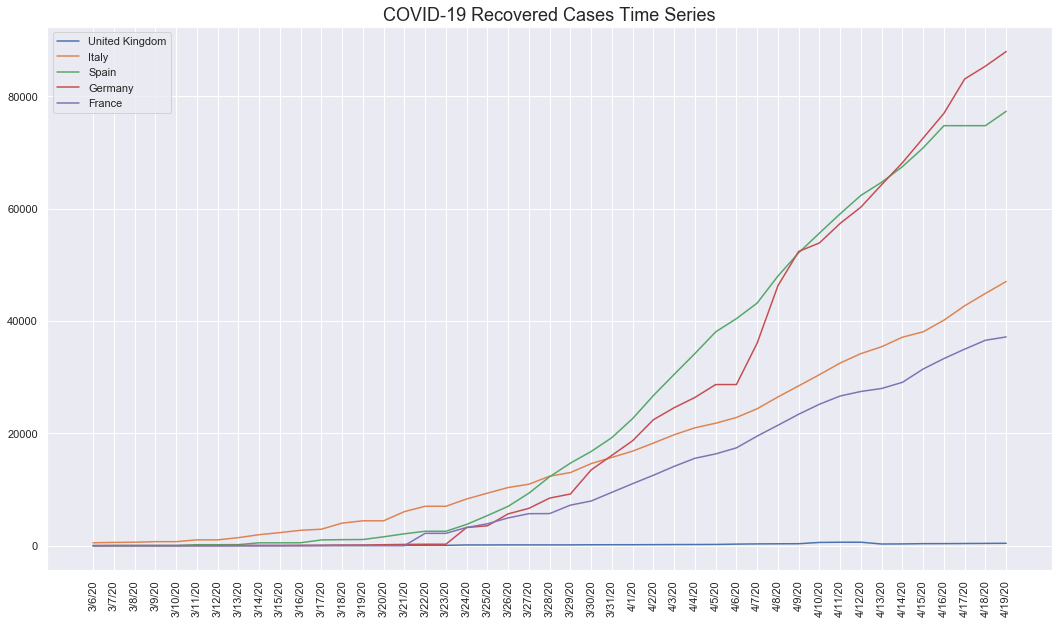

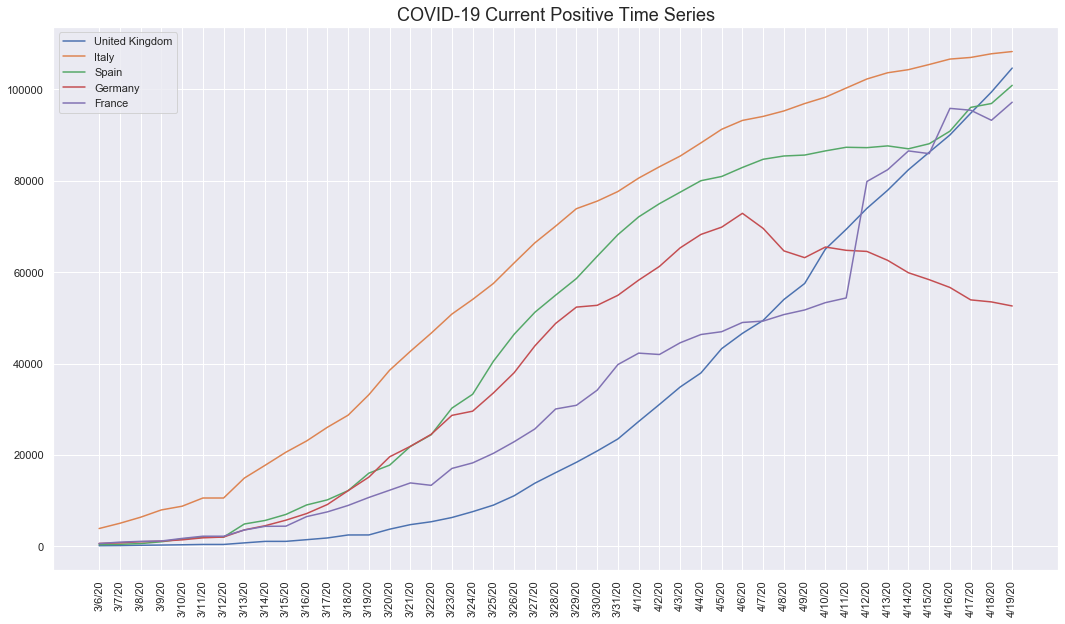

In [40]:
plotter_top_ctry(["United Kingdom", "Italy", "Spain","Germany", "France"],n=45, wuhan=False)

Total Confirmed Cases : 1195184
Total Recovered Patients : 347306
Total Deaths : 83939


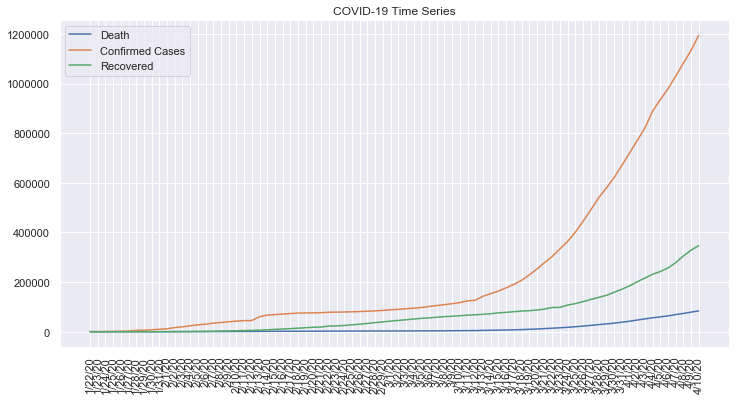

Mortality Rate: 7.02%


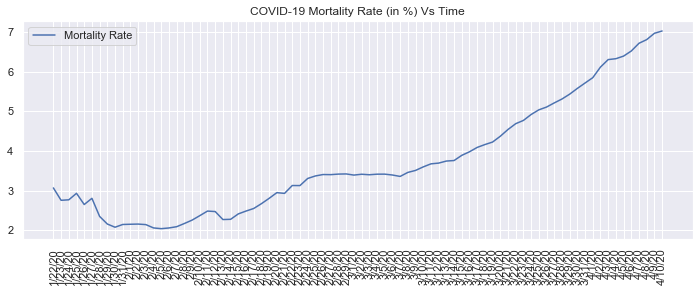

Total Confirmed Cases : 496535
Total Recovered Patients : 28790
Total Deaths : 18586


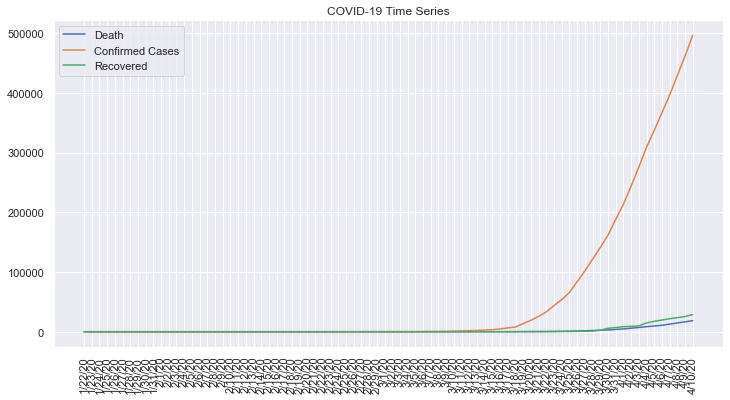

Mortality Rate: 3.74%


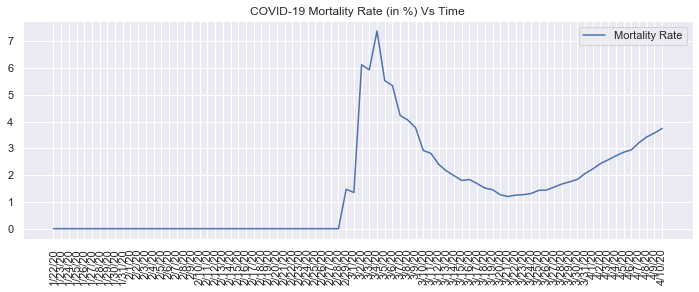

In [32]:
stats_plotter(except_country("US"))
stats_plotter(only_country("US"))

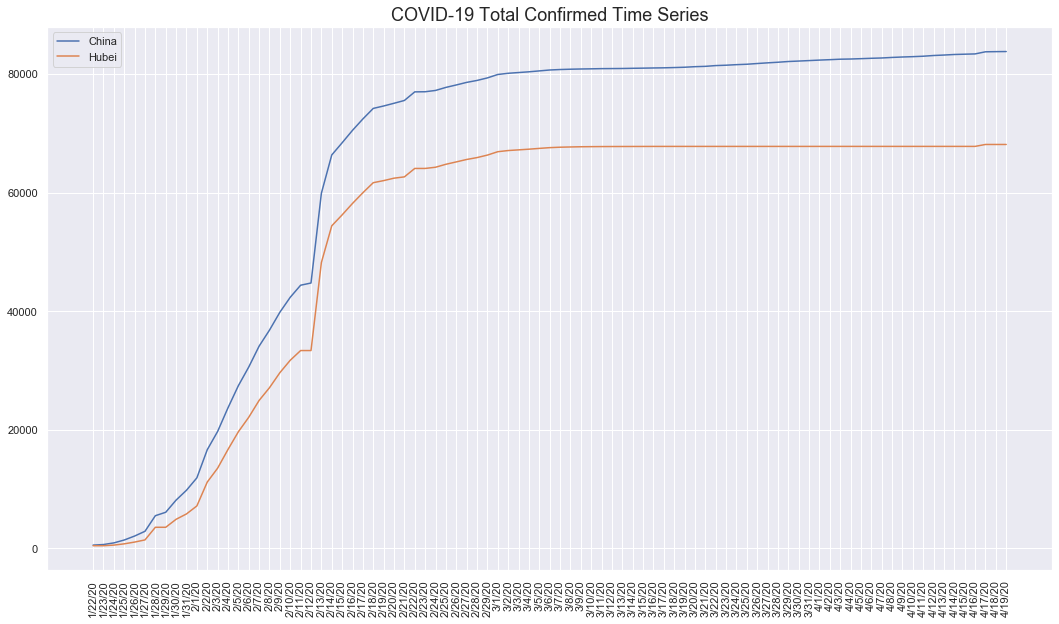

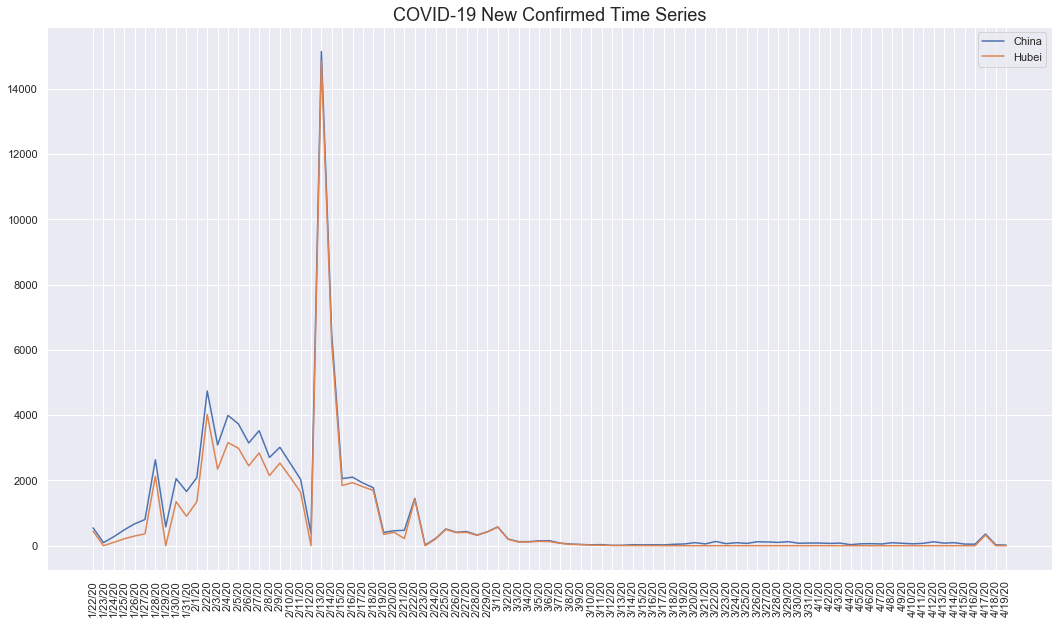

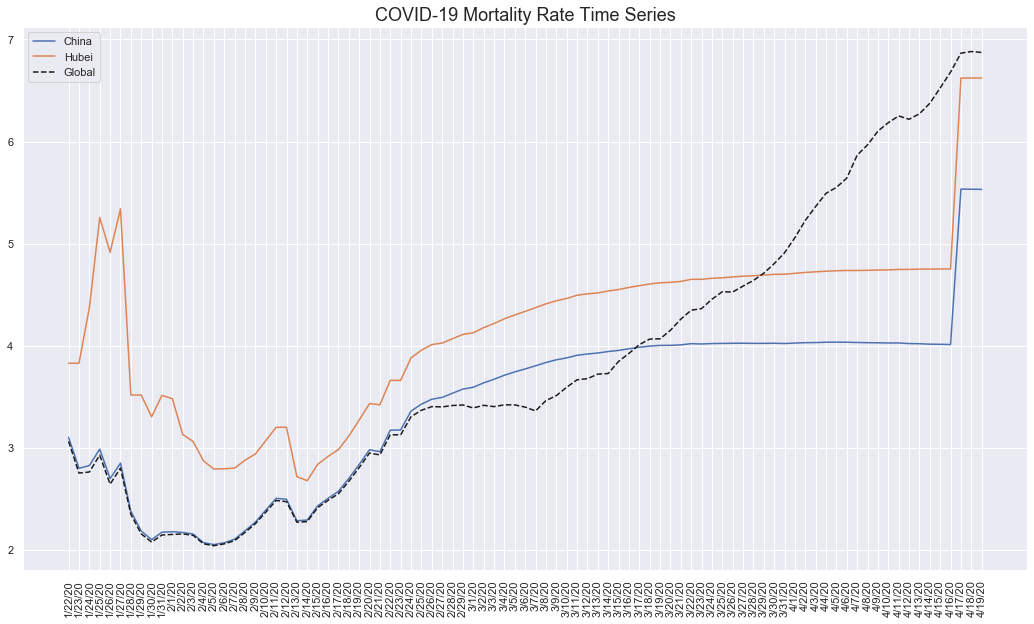

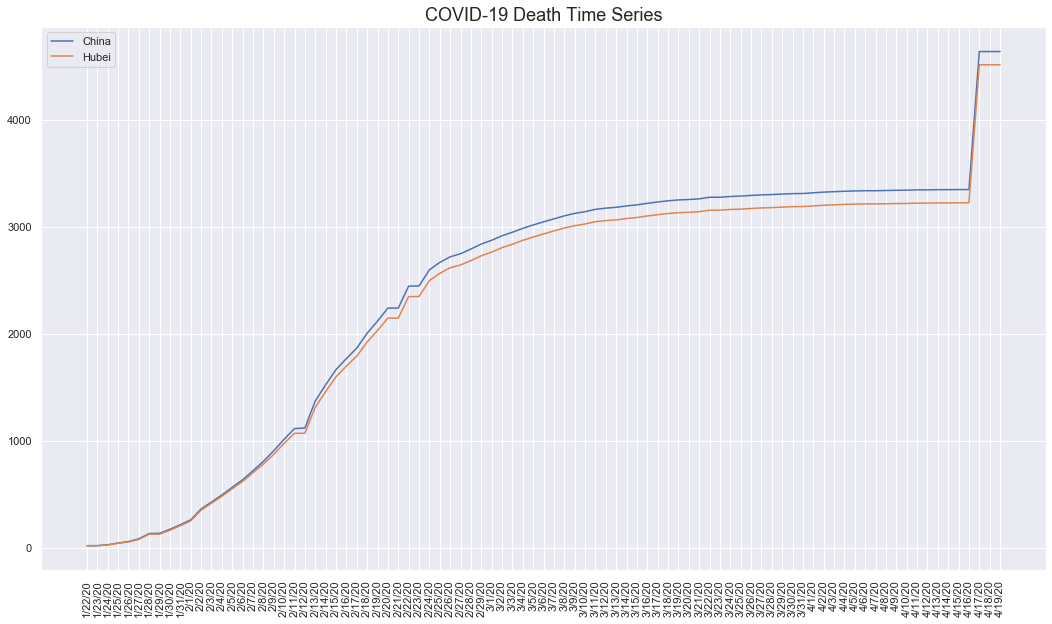

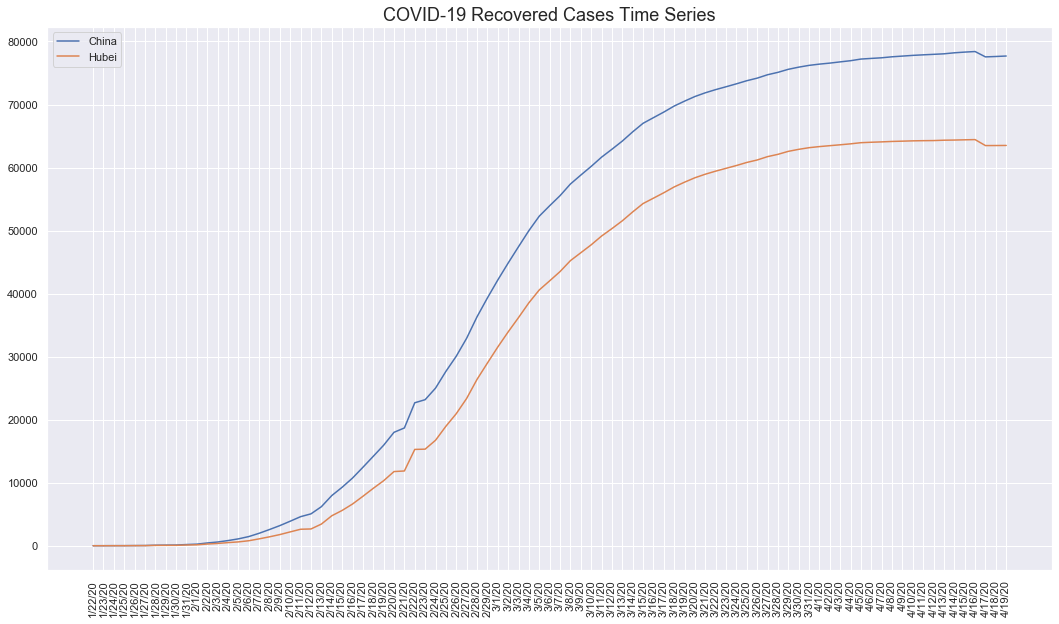

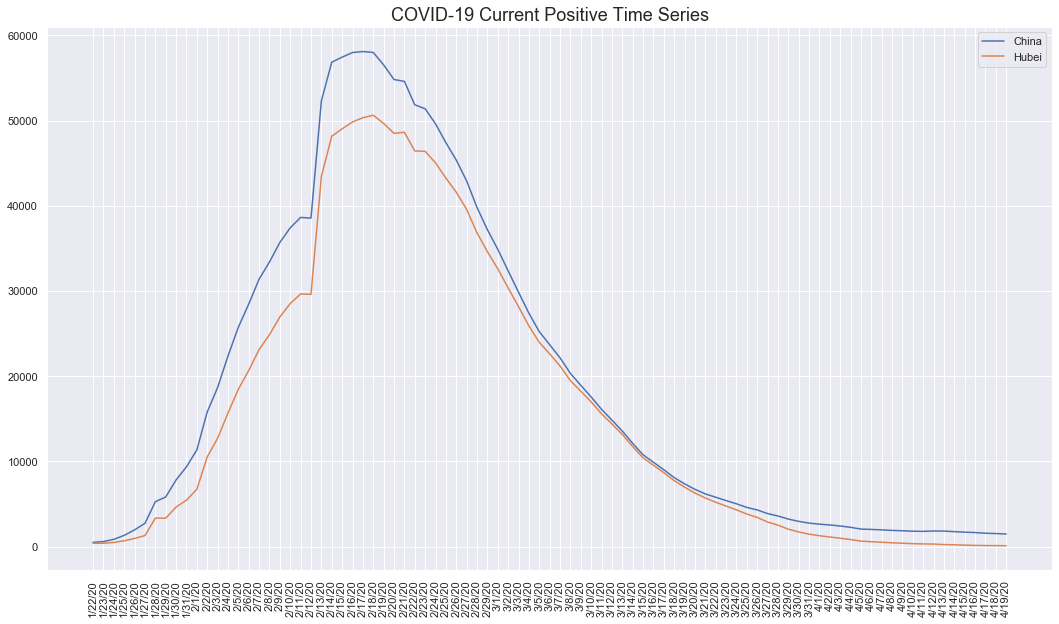

In [41]:
plotter_top_ctry(["China"], wuhan=True)

### China Last

In [59]:
chn_last=df_conf[df_conf["Country/Region"]=="China"].iloc[:,[1,0,-8,-1]]
chn_last["NC"]=chn_last.iloc[:,-1]-chn_last.iloc[:,-2]
print(chn_last.NC.sum())
chn_last.sort_values(by=["NC"], ascending=False)

671


Country/Region  Province/State  4/12/20  4/19/20   NC
62          China           Hubei    67803    68128  325
59          China    Heilongjiang      684      898  214
54          China       Guangdong     1552     1580   28
74          China        Shanghai      607      635   28
75          China          Shanxi      172      197   25
61          China       Hong Kong     1004     1025   21
77          China         Tianjin      183      189    6
67          China           Jilin       99      104    5
50          China         Beijing      589      593    4
64          China  Inner Mongolia      189      193    4
73          China        Shandong      784      787    3
52          China          Fujian      352      355    3
81          China        Zhejiang     1267     1268    1
68          China        Liaoning      145      146    1
76          China         Sichuan      560      561    1
58          China           Hebei      327      328    1
56          China         Guizhou      146      147    1
71          China         Qinghai       18       18    0
78          China           Tibet        1        1    0
79          China        Xinjiang       76       76    0
80          China          Yunnan      184      184    0
72          China         Shaanxi      256      256    0
49          China           Anhui      991      991    0
70          China         Ningxia       75       75    0
69          China           Macau       45       45    0
66          China         Jiangxi      937      937    0
63          China           Hunan     1019     1019    0
60          China           Henan     1276     1276    0
57          China          Hainan      168      168    0
55          China         Guangxi      254      254    0
53          China           Gansu      139      139    0
51          China       Chongqing      579      579    0
65          China         Jiangsu      653      653    0

In [55]:
df_rec[df_rec["Province/State"]=="Hubei"].iloc[:,-10:]

4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  \
53    64236    64264    64281    64338    64363    64402    64435    63487   

    4/18/20  4/19/20  
53    63494    63507

In [52]:
4512-3222

1290

In [56]:
63487-64435

-948

In [11]:
df_death["Province/State"].unique()

array([nan, 'British Columbia', 'New South Wales', 'Victoria',
       'Queensland', 'South Australia', 'From Diamond Princess',
       'Western Australia', 'Tasmania', 'Northern Territory', 'Ontario',
       'Alberta', 'Quebec', 'Washington', 'New York', 'California',
       'Massachusetts', 'Diamond Princess', 'Grand Princess', 'Georgia',
       'Colorado', 'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Hubei', 'France', 'G

In [12]:
county_CA=['Solano, CA', 'Santa Cruz, CA', 'Napa, CA', 'Ventura, CA','Marin, CA', 'Calaveras, CA',
'Stanislaus, CA', 'San Joaquin, CA', 'Humboldt County, CA', 'Sacramento County, CA',
'San Diego County, CA', 'San Benito, CA', 'Los Angeles, CA','San Francisco County, CA', 'Contra Costa County, CA',
'Orange County, CA','Placer County, CA', 'San Mateo, CA',
'Sonoma County, CA','Shasta County, CA','Fresno County, CA','Riverside County, CA', 'Alameda County, CA','Madera County, CA','Yolo County, CA', 'Santa Clara County, CA']
len(county_CA)

26

In [35]:
df_county=only_state("Solano, CA")
for county in county_CA:
    df_temp=only_state(county)
    df_county.Death=df_county.Death+df_temp.Death
    df_county.Rec=df_county.Rec+df_temp.Rec
    df_county.Conf=df_county.Conf+df_temp.Conf
    df_county.NewConf=df_county.NewConf+df_temp.NewConf
df_county

C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Date  Death  Rec  Conf  MortRate  NewConf
0   1/22/20      0    0     0       NaN        0
1   1/23/20      0    0     0       NaN        0
2   1/24/20      0    0     0       NaN        0
3   1/25/20      0    0     0       NaN        0
4   1/26/20      0    0     2       NaN        2
5   1/27/20      0    0     2       NaN        0
6   1/28/20      0    0     2       NaN        0
7   1/29/20      0    0     2       NaN        0
8   1/30/20      0    0     2       NaN        0
9   1/31/20      0    0     3       NaN        1
10   2/1/20      0    0     3       NaN        0
11   2/2/20      0    0     3       NaN        0
12   2/3/20      0    0     6       NaN        3
13   2/4/20      0    0     6       NaN        0
14   2/5/20      0    0     6       NaN        0
15   2/6/20      0    0     6       NaN        0
16   2/7/20      0    0     6       NaN        0
17   2/8/20      0    0     6       NaN        0
18   2/9/20      0    0     6       NaN        0
19  2/10/20      0    0     6       NaN        0
20  2/11/20      0    0     7       NaN        1
21  2/12/20      0    0     7       NaN        0
22  2/13/20      0    0     8       NaN        1
23  2/14/20      0    0     8       NaN        0
24  2/15/20      0    0     8       NaN        0
25  2/16/20      0    0     8       NaN        0
26  2/17/20      0    0     8       NaN        0
27  2/18/20      0    0     8       NaN        0
28  2/19/20      0    0     8       NaN        0
29  2/20/20      0    0     8       NaN        0
30  2/21/20      0    2    10       NaN        2
31  2/22/20      0    2    10       NaN        0
32  2/23/20      0    2    10       NaN        0
33  2/24/20      0    2    10       NaN        0
34  2/25/20      0    2    10       NaN        0
35  2/26/20      0    2    10       NaN        0
36  2/27/20      0    2    11       NaN        1
37  2/28/20      0    2    11       NaN        0
38  2/29/20      0    2    12       NaN        1
39   3/1/20      0    2    12       NaN        0
40   3/2/20      0    2    21       NaN        9
41   3/3/20      0    2    25       NaN        4
42   3/4/20      1    2    35       NaN       10
43   3/5/20      1    2    51       NaN       16
44   3/6/20      1    2    59       NaN        8
45   3/7/20      1    2    81       NaN       22
46   3/8/20      1    2    95       NaN       14
47   3/9/20      1    2   101       NaN        6
48  3/10/20      0    0     0       NaN     -101
49  3/11/20      0    0     0       NaN        0
50  3/12/20      0    0     0       NaN        0
51  3/13/20      0    0     0       NaN        0
52  3/14/20      0    0     0       NaN        0
53  3/15/20      0    0     0       NaN        0
54  3/16/20      0    0     0       NaN        0
55  3/17/20      0    0     0       NaN        0
56  3/18/20      0    0     0       NaN        0
57  3/19/20      0    0     0       NaN        0
58  3/20/20      0    0     0       NaN        0

In [36]:
df_cali.Death=df_county.Death+df_cali.Death
df_cali.Rec=df_county.Rec+df_cali.Rec
df_cali.Conf=df_county.Conf+df_cali.Conf
df_cali.NewConf=df_county.NewConf+df_cali.NewConf
df_cali

Date  Death  Rec  Conf  MortRate  NewConf
0   1/22/20      0    0     0       NaN        0
1   1/23/20      0    0     0       NaN        0
2   1/24/20      0    0     0       NaN        0
3   1/25/20      0    0     0       NaN        0
4   1/26/20      0    0     2       NaN        2
5   1/27/20      0    0     2       NaN        0
6   1/28/20      0    0     2       NaN        0
7   1/29/20      0    0     2       NaN        0
8   1/30/20      0    0     2       NaN        0
9   1/31/20      0    0     3       NaN        1
10   2/1/20      0    0     3       NaN        0
11   2/2/20      0    0     3       NaN        0
12   2/3/20      0    0     6       NaN        3
13   2/4/20      0    0     6       NaN        0
14   2/5/20      0    0     6       NaN        0
15   2/6/20      0    0     6       NaN        0
16   2/7/20      0    0     6       NaN        0
17   2/8/20      0    0     6       NaN        0
18   2/9/20      0    0     6       NaN        0
19  2/10/20      0    0     6       NaN        0
20  2/11/20      0    0     7       NaN        1
21  2/12/20      0    0     7       NaN        0
22  2/13/20      0    0     8       NaN        1
23  2/14/20      0    0     8       NaN        0
24  2/15/20      0    0     8       NaN        0
25  2/16/20      0    0     8       NaN        0
26  2/17/20      0    0     8       NaN        0
27  2/18/20      0    0     8       NaN        0
28  2/19/20      0    0     8       NaN        0
29  2/20/20      0    0     8       NaN        0
30  2/21/20      0    2    10       NaN        2
31  2/22/20      0    2    10       NaN        0
32  2/23/20      0    2    10       NaN        0
33  2/24/20      0    2    10       NaN        0
34  2/25/20      0    2    10       NaN        0
35  2/26/20      0    2    10       NaN        0
36  2/27/20      0    2    11       NaN        1
37  2/28/20      0    2    11       NaN        0
38  2/29/20      0    2    12       NaN        1
39   3/1/20      0    2    12       NaN        0
40   3/2/20      0    2    21       NaN        9
41   3/3/20      0    2    25       NaN        4
42   3/4/20      1    2    35       NaN       10
43   3/5/20      1    2    51       NaN       16
44   3/6/20      1    2    59       NaN        8
45   3/7/20      1    2    81       NaN       22
46   3/8/20      1    2    95       NaN       14
47   3/9/20      1    2   101       NaN        6
48  3/10/20      2    2   144  1.388889       43
49  3/11/20      3    2   177  1.694915       33
50  3/12/20      4    6   221  1.809955       44
51  3/13/20      4    6   282  1.418440       61
52  3/14/20      5    6   340  1.470588       58
53  3/15/20      6    6   426  1.408451       86
54  3/16/20      7    6   557  1.256732      131
55  3/17/20     12    6   698  1.719198      141
56  3/18/20     13    0   751  1.731025       53
57  3/19/20     18    0   952  1.890756      201
58  3/20/20     23    0  1177  1.954121      225

In [85]:
df_cal_2=only_state("California")
df_cal_2.Death=df_county.Death+df_cal_2.Death
df_cal_2.Rec=df_county.Rec+df_cal_2.Rec
df_cal_2.Conf=df_county.Conf+df_cal_2.Conf
df_cal_2.NewConf=df_county.NewConf+df_cal_2.NewConf
df_cal_2

C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Date  Death  Rec  Conf  MortRate  NewConf
0   1/22/20      0    0     0       NaN        0
1   1/23/20      0    0     0       NaN        0
2   1/24/20      0    0     0       NaN        0
3   1/25/20      0    0     0       NaN        0
4   1/26/20      0    0     2       NaN        2
5   1/27/20      0    0     2       NaN        0
6   1/28/20      0    0     2       NaN        0
7   1/29/20      0    0     2       NaN        0
8   1/30/20      0    0     2       NaN        0
9   1/31/20      0    0     3       NaN        1
10   2/1/20      0    0     3       NaN        0
11   2/2/20      0    0     3       NaN        0
12   2/3/20      0    0     6       NaN        3
13   2/4/20      0    0     6       NaN        0
14   2/5/20      0    0     6       NaN        0
15   2/6/20      0    0     6       NaN        0
16   2/7/20      0    0     6       NaN        0
17   2/8/20      0    0     6       NaN        0
18   2/9/20      0    0     6       NaN        0
19  2/10/20      0    0     6       NaN        0
20  2/11/20      0    0     7       NaN        1
21  2/12/20      0    0     7       NaN        0
22  2/13/20      0    0     8       NaN        1
23  2/14/20      0    0     8       NaN        0
24  2/15/20      0    0     8       NaN        0
25  2/16/20      0    0     8       NaN        0
26  2/17/20      0    0     8       NaN        0
27  2/18/20      0    0     8       NaN        0
28  2/19/20      0    0     8       NaN        0
29  2/20/20      0    0     8       NaN        0
30  2/21/20      0    2    10       NaN        2
31  2/22/20      0    2    10       NaN        0
32  2/23/20      0    2    10       NaN        0
33  2/24/20      0    2    10       NaN        0
34  2/25/20      0    2    10       NaN        0
35  2/26/20      0    2    10       NaN        0
36  2/27/20      0    2    11       NaN        1
37  2/28/20      0    2    11       NaN        0
38  2/29/20      0    2    12       NaN        1
39   3/1/20      0    2    12       NaN        0
40   3/2/20      0    2    21       NaN        9
41   3/3/20      0    2    25       NaN        4
42   3/4/20      1    2    35       NaN       10
43   3/5/20      1    2    51       NaN       16
44   3/6/20      1    2    59       NaN        8
45   3/7/20      1    2    81       NaN       22
46   3/8/20      1    2    95       NaN       14
47   3/9/20      1    2   101       NaN        6
48  3/10/20      2    2   144  1.388889       43
49  3/11/20      3    2   177  1.694915       33
50  3/12/20      4    6   221  1.809955       44
51  3/13/20      4    6   282  1.418440       61
52  3/14/20      5    6   340  1.470588       58
53  3/15/20      6    6   426  1.408451       86
54  3/16/20      7    6   557  1.256732      131
55  3/17/20     12    6   698  1.719198      141
56  3/18/20     13    0   751  1.731025       53
57  3/19/20     18    0   952  1.890756      201
58  3/20/20     23    0  1177  1.954121      225

In [87]:
df_cal_2=df_cal_2.iloc[:-2,:]
df_cal_2

Date  Death  Rec  Conf  MortRate  NewConf
0   1/22/20      0    0     0       NaN        0
1   1/23/20      0    0     0       NaN        0
2   1/24/20      0    0     0       NaN        0
3   1/25/20      0    0     0       NaN        0
4   1/26/20      0    0     2       NaN        2
5   1/27/20      0    0     2       NaN        0
6   1/28/20      0    0     2       NaN        0
7   1/29/20      0    0     2       NaN        0
8   1/30/20      0    0     2       NaN        0
9   1/31/20      0    0     3       NaN        1
10   2/1/20      0    0     3       NaN        0
11   2/2/20      0    0     3       NaN        0
12   2/3/20      0    0     6       NaN        3
13   2/4/20      0    0     6       NaN        0
14   2/5/20      0    0     6       NaN        0
15   2/6/20      0    0     6       NaN        0
16   2/7/20      0    0     6       NaN        0
17   2/8/20      0    0     6       NaN        0
18   2/9/20      0    0     6       NaN        0
19  2/10/20      0    0     6       NaN        0
20  2/11/20      0    0     7       NaN        1
21  2/12/20      0    0     7       NaN        0
22  2/13/20      0    0     8       NaN        1
23  2/14/20      0    0     8       NaN        0
24  2/15/20      0    0     8       NaN        0
25  2/16/20      0    0     8       NaN        0
26  2/17/20      0    0     8       NaN        0
27  2/18/20      0    0     8       NaN        0
28  2/19/20      0    0     8       NaN        0
29  2/20/20      0    0     8       NaN        0
30  2/21/20      0    2    10       NaN        2
31  2/22/20      0    2    10       NaN        0
32  2/23/20      0    2    10       NaN        0
33  2/24/20      0    2    10       NaN        0
34  2/25/20      0    2    10       NaN        0
35  2/26/20      0    2    10       NaN        0
36  2/27/20      0    2    11       NaN        1
37  2/28/20      0    2    11       NaN        0
38  2/29/20      0    2    12       NaN        1
39   3/1/20      0    2    12       NaN        0
40   3/2/20      0    2    21       NaN        9
41   3/3/20      0    2    25       NaN        4
42   3/4/20      1    2    35       NaN       10
43   3/5/20      1    2    51       NaN       16
44   3/6/20      1    2    59       NaN        8
45   3/7/20      1    2    81       NaN       22
46   3/8/20      1    2    95       NaN       14
47   3/9/20      1    2   101       NaN        6
48  3/10/20      2    2   144  1.388889       43
49  3/11/20      3    2   177  1.694915       33
50  3/12/20      4    6   221  1.809955       44
51  3/13/20      4    6   282  1.418440       61
52  3/14/20      5    6   340  1.470588       58
53  3/15/20      6    6   426  1.408451       86
54  3/16/20      7    6   557  1.256732      131
55  3/17/20     12    6   698  1.719198      141
56  3/18/20     13    0   751  1.731025       53

In [90]:
train.ConfirmedCases=df_cal_2.Conf
train.Fatalities=df_cal_2.Death
train.to_csv("ca_train_updated.csv",index=False)

In [37]:
#Since regular increase in cases happen from 36th index
df_cali=df_cali.iloc[36:,:]
df_cali

Date  Death  Rec  Conf  MortRate  NewConf
36  2/27/20      0    2    11       NaN        1
37  2/28/20      0    2    11       NaN        0
38  2/29/20      0    2    12       NaN        1
39   3/1/20      0    2    12       NaN        0
40   3/2/20      0    2    21       NaN        9
41   3/3/20      0    2    25       NaN        4
42   3/4/20      1    2    35       NaN       10
43   3/5/20      1    2    51       NaN       16
44   3/6/20      1    2    59       NaN        8
45   3/7/20      1    2    81       NaN       22
46   3/8/20      1    2    95       NaN       14
47   3/9/20      1    2   101       NaN        6
48  3/10/20      2    2   144  1.388889       43
49  3/11/20      3    2   177  1.694915       33
50  3/12/20      4    6   221  1.809955       44
51  3/13/20      4    6   282  1.418440       61
52  3/14/20      5    6   340  1.470588       58
53  3/15/20      6    6   426  1.408451       86
54  3/16/20      7    6   557  1.256732      131
55  3/17/20     12    6   698  1.719198      141
56  3/18/20     13    0   751  1.731025       53
57  3/19/20     18    0   952  1.890756      201
58  3/20/20     23    0  1177  1.954121      225

In [38]:
df_cali.reset_index(inplace=True)
df_cali.drop("MortRate", axis=1, inplace=True)
df_cali

index     Date  Death  Rec  Conf  MortRate  NewConf
0      36  2/27/20      0    2    11       NaN        1
1      37  2/28/20      0    2    11       NaN        0
2      38  2/29/20      0    2    12       NaN        1
3      39   3/1/20      0    2    12       NaN        0
4      40   3/2/20      0    2    21       NaN        9
5      41   3/3/20      0    2    25       NaN        4
6      42   3/4/20      1    2    35       NaN       10
7      43   3/5/20      1    2    51       NaN       16
8      44   3/6/20      1    2    59       NaN        8
9      45   3/7/20      1    2    81       NaN       22
10     46   3/8/20      1    2    95       NaN       14
11     47   3/9/20      1    2   101       NaN        6
12     48  3/10/20      2    2   144  1.388889       43
13     49  3/11/20      3    2   177  1.694915       33
14     50  3/12/20      4    6   221  1.809955       44
15     51  3/13/20      4    6   282  1.418440       61
16     52  3/14/20      5    6   340  1.470588       58
17     53  3/15/20      6    6   426  1.408451       86
18     54  3/16/20      7    6   557  1.256732      131
19     55  3/17/20     12    6   698  1.719198      141
20     56  3/18/20     13    0   751  1.731025       53
21     57  3/19/20     18    0   952  1.890756      201
22     58  3/20/20     23    0  1177  1.954121      225

In [42]:
df_cali["DeltaInc"]=1.1
for i in range(1,df_cali.shape[0]):
    df_cali.DeltaInc[i]=df_cali.Conf[i]/df_cali.Conf[i-1]
df_cali

C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


index     Date  Death  Rec  Conf  NewConf  DeltaInc
0      36  2/27/20      0    2    11        1  1.100000
1      37  2/28/20      0    2    11        0  1.000000
2      38  2/29/20      0    2    12        1  1.090909
3      39   3/1/20      0    2    12        0  1.000000
4      40   3/2/20      0    2    21        9  1.750000
5      41   3/3/20      0    2    25        4  1.190476
6      42   3/4/20      1    2    35       10  1.400000
7      43   3/5/20      1    2    51       16  1.457143
8      44   3/6/20      1    2    59        8  1.156863
9      45   3/7/20      1    2    81       22  1.372881
10     46   3/8/20      1    2    95       14  1.172840
11     47   3/9/20      1    2   101        6  1.063158
12     48  3/10/20      2    2   144       43  1.425743
13     49  3/11/20      3    2   177       33  1.229167
14     50  3/12/20      4    6   221       44  1.248588
15     51  3/13/20      4    6   282       61  1.276018
16     52  3/14/20      5    6   340       58  1.205674
17     53  3/15/20      6    6   426       86  1.252941
18     54  3/16/20      7    6   557      131  1.307512
19     55  3/17/20     12    6   698      141  1.253142
20     56  3/18/20     13    0   751       53  1.075931
21     57  3/19/20     18    0   952      201  1.267643
22     58  3/20/20     23    0  1177      225  1.236345

In [47]:
df_cali["LogConf"]=np.log(df_cali.Conf)
df_cali["Day"]=df_cali.index
df_cali

C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


index     Date  Death  Rec  Conf  NewConf  DeltaInc   LogConf  Day
0      36  2/27/20      0    2    11        1  1.100000  2.397895    0
1      37  2/28/20      0    2    11        0  1.000000  2.397895    1
2      38  2/29/20      0    2    12        1  1.090909  2.484907    2
3      39   3/1/20      0    2    12        0  1.000000  2.484907    3
4      40   3/2/20      0    2    21        9  1.750000  3.044522    4
5      41   3/3/20      0    2    25        4  1.190476  3.218876    5
6      42   3/4/20      1    2    35       10  1.400000  3.555348    6
7      43   3/5/20      1    2    51       16  1.457143  3.931826    7
8      44   3/6/20      1    2    59        8  1.156863  4.077537    8
9      45   3/7/20      1    2    81       22  1.372881  4.394449    9
10     46   3/8/20      1    2    95       14  1.172840  4.553877   10
11     47   3/9/20      1    2   101        6  1.063158  4.615121   11
12     48  3/10/20      2    2   144       43  1.425743  4.969813   12
13     49  3/11/20      3    2   177       33  1.229167  5.176150   13
14     50  3/12/20      4    6   221       44  1.248588  5.398163   14
15     51  3/13/20      4    6   282       61  1.276018  5.641907   15
16     52  3/14/20      5    6   340       58  1.205674  5.828946   16
17     53  3/15/20      6    6   426       86  1.252941  6.054439   17
18     54  3/16/20      7    6   557      131  1.307512  6.322565   18
19     55  3/17/20     12    6   698      141  1.253142  6.548219   19
20     56  3/18/20     13    0   751       53  1.075931  6.621406   20
21     57  3/19/20     18    0   952      201  1.267643  6.858565   21
22     58  3/20/20     23    0  1177      225  1.236345  7.070724   22

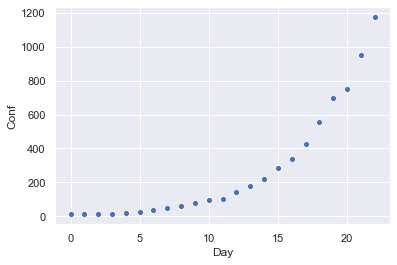

In [50]:
sns.set(style="darkgrid")
sns.scatterplot(df_cali.Day, df_cali.Conf)

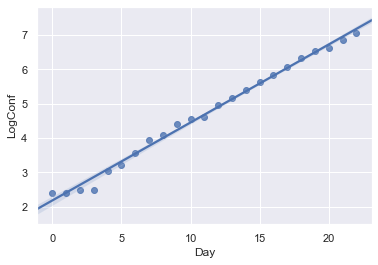

In [51]:
sns.regplot(df_cali.Day, df_cali.LogConf, data=df_cali)

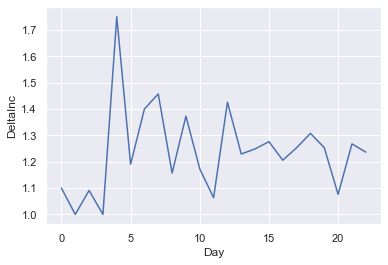

In [53]:
sns.lineplot(df_cali.Day, df_cali.DeltaInc, data=df_cali)

In [55]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [58]:
x=np.array(df_cali.Day).reshape(-1,1)
y=df_cali.LogConf
y2=np.log2(df_cali.Conf)
model.fit(x,y2)
model.score(x,y2)

0.9934226299163391

In [64]:
days_to2=1/model.coef_[0]
r=np.power(2,model.coef_[0])
print(r)
days_to2

1.2549886078260952


3.0518111954074785

In [ ]:
20 22 available upto
21 23

2224 required
23
24
25
26 28

In [81]:
#Read submission file
sub=pd.read_csv("covid19-local-us-ca-forecasting-week-1\ca_submission.csv")
test=sub=pd.read_csv("covid19-local-us-ca-forecasting-week-1\ca_test.csv")
train=pd.read_csv("covid19-local-us-ca-forecasting-week-1\ca_train.csv")
print(sub.shape)
print(test.shape)
print(train.shape)

(43, 6)
(43, 6)
(57, 8)


In [84]:
train

Id Province/State Country/Region      Lat      Long        Date  \
0    1     California             US  36.1162 -119.6816  2020-01-22   
1    2     California             US  36.1162 -119.6816  2020-01-23   
2    3     California             US  36.1162 -119.6816  2020-01-24   
3    4     California             US  36.1162 -119.6816  2020-01-25   
4    5     California             US  36.1162 -119.6816  2020-01-26   
5    6     California             US  36.1162 -119.6816  2020-01-27   
6    7     California             US  36.1162 -119.6816  2020-01-28   
7    8     California             US  36.1162 -119.6816  2020-01-29   
8    9     California             US  36.1162 -119.6816  2020-01-30   
9   10     California             US  36.1162 -119.6816  2020-01-31   
10  11     California             US  36.1162 -119.6816  2020-02-01   
11  12     California             US  36.1162 -119.6816  2020-02-02   
12  13     California             US  36.1162 -119.6816  2020-02-03   
13  14     California             US  36.1162 -119.6816  2020-02-04   
14  15     California             US  36.1162 -119.6816  2020-02-05   
15  16     California             US  36.1162 -119.6816  2020-02-06   
16  17     California             US  36.1162 -119.6816  2020-02-07   
17  18     California             US  36.1162 -119.6816  2020-02-08   
18  19     California             US  36.1162 -119.6816  2020-02-09   
19  20     California             US  36.1162 -119.6816  2020-02-10   
20  21     California             US  36.1162 -119.6816  2020-02-11   
21  22     California             US  36.1162 -119.6816  2020-02-12   
22  23     California             US  36.1162 -119.6816  2020-02-13   
23  24     California             US  36.1162 -119.6816  2020-02-14   
24  25     California             US  36.1162 -119.6816  2020-02-15   
25  26     California             US  36.1162 -119.6816  2020-02-16   
26  27     California             US  36.1162 -119.6816  2020-02-17   
27  28     California             US  36.1162 -119.6816  2020-02-18   
28  29     California             US  36.1162 -119.6816  2020-02-19   
29  30     California             US  36.1162 -119.6816  2020-02-20   
30  31     California             US  36.1162 -119.6816  2020-02-21   
31  32     California             US  36.1162 -119.6816  2020-02-22   
32  33     California             US  36.1162 -119.6816  2020-02-23   
33  34     California             US  36.1162 -119.6816  2020-02-24   
34  35     California             US  36.1162 -119.6816  2020-02-25   
35  36     California             US  36.1162 -119.6816  2020-02-26   
36  37     California             US  36.1162 -119.6816  2020-02-27   
37  38     California             US  36.1162 -119.6816  2020-02-28   
38  39     California             US  36.1162 -119.6816  2020-02-29   
39  40     California             US  36.1162 -119.6816  2020-03-01   
40  41     California             US  36.1162 -119.6816  2020-03-02   
41  42     California             US  36.1162 -119.6816  2020-03-03   
42  43     California             US  36.1162 -119.6816  2020-03-04   
43  44     California             US  36.1162 -119.6816  2020-03-05   
44  45     California             US  36.1162 -119.6816  2020-03-06   
45  46     California             US  36.1162 -119.6816  2020-03-07   
46  47     California             US  36.1162 -119.6816  2020-03-08   
47  48     California             US  36.1162 -119.6816  2020-03-09   
48  49     California             US  36.1162 -119.6816  2020-03-10   
49  50     California             US  36.1162 -119.6816  2020-03-11   
50  51     California             US  36.1162 -119.6816  2020-03-12   
51  52     California             US  36.1162 -119.6816  2020-03-13   
52  53     California             US  36.1162 -119.6816  2020-03-14   
53  54     California             US  36.1162 -119.6816  2020-03-15   
54  55     California             US  36.1162 -119.6816  2020-03-16   
55  56     California       

### predicting conf cases

In [68]:
pred_index=np.arange(22,29)
pred_conf=[1177]
c=1177
for i in range(len(pred_index)-1):
    c*=r
    pred_conf.append(int(c))
pred_conf

[1177, 1477, 1853, 2326, 2919, 3664, 4598]

### Predicting death

In [71]:
y=df_cali.Death
x=np.array(df_cali.Conf).reshape(-1,1)
model_d=LinearRegression()
model_d.fit(x,y)
model_d.score(x,y)

0.9804098730662011

In [78]:
pred_death=model_d.predict(np.array(pred_conf).reshape(-1,1))
pred_d=[]
for i in range(len(pred_death)):
    pred_d.append(int(pred_death[i]))
pred_d

[21, 26, 33, 42, 53, 67, 84]

In [79]:
df_dict={"ForecastId":pred_index,"ConfirmedCases":pred_conf,"Fatalities":pred_d}
df_const=pd.DataFrame(df_dict)
df_const

ForecastId  ConfirmedCases  Fatalities
0          22            1177          21
1          23            1477          26
2          24            1853          33
3          25            2326          42
4          26            2919          53
5          27            3664          67
6          28            4598          84

In [12]:
df_conf.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/5/20  6/6/20  6/7/20  6/8/20  6/9/20  \
0        0        0        0  ...   18969   19551   20342   20917   21459   
1        0        0        0  ...    1212    1232    1246    1263    1299   
2        0        0        0  ...    9935   10050   10154   10265   10382   
3        0        0        0  ...     852     852     852     852     852   
4        0        0        0  ...      86      88      91      92      96   

   6/10/20  6/11/20  6/12/20  6/13/20  6/14/20  
0    22142    22890    23546    24102    24766  
1     1341     1385     1416     1464     1521  
2    10484    10589    10698    10810    10919  
3      852      852      853      853      853  
4      113      118      130      138      140  

[5 rows x 149 columns]

In [45]:
country_list=df_c["Country/Region"].unique()
print(len(country_list))

188


In [19]:
fl_data=pd.read_csv("flourish data.csv", encoding="ISO-8859-1")
fl_data.shape

(215, 3)

In [20]:
fl_data.head()

Country Name  region                                   Image URL
0        Angola  Africa  https://www.countryflags.io/ao/flat/64.png
1       Burundi  Africa  https://www.countryflags.io/bi/flat/64.png
2         Benin  Africa  https://www.countryflags.io/bj/flat/64.png
3  Burkina Faso  Africa  https://www.countryflags.io/bf/flat/64.png
4      Botswana  Africa  https://www.countryflags.io/bw/flat/64.png

In [95]:
false_set=set(country_list)-fl_ctry
set(country_list)-fl_ctry

{'Diamond Princess',
 'Holy See',
 'Kosovo',
 'MS Zaandam',
 'Taiwan*',
 'Western Sahara'}

In [47]:
fl_ctry=set(fl_data["Country Name"].unique())
fl_ctry-set(country_list)

{'American Samoa',
 'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Curacao',
 'Faroe Islands',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Hong Kong SAR, China',
 'Isle of Man',
 'Kiribati',
 'Korea, Dem. People\x92s Rep.',
 'Macao SAR, China',
 'Marshall Islands',
 'Micronesia, Fed. Sts.',
 'Nauru',
 'New Caledonia',
 'Northern Mariana Islands',
 'Palau',
 'Puerto Rico',
 'Samoa',
 'Sint Maarten (Dutch part)',
 'Solomon Islands',
 'St. Martin (French part)',
 'Tonga',
 'Turkmenistan',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Vanuatu',
 'Virgin Islands (U.S.)'}

In [44]:
fl_data['Country Name'][fl_data['Country Name']=='Bahamas, The']='Bahamas'
fl_data['Country Name'][fl_data['Country Name']=="Brunei Darussalam"]='Brunei'
fl_data['Country Name'][fl_data['Country Name']=="Myanmar"]='Burma'
fl_data['Country Name'][fl_data['Country Name']=="Congo, Rep."]='Congo (Brazzaville)'
fl_data['Country Name'][fl_data['Country Name']=="Congo, Dem. Rep."]='Congo (Kinshasa)'
fl_data['Country Name'][fl_data['Country Name']=="Czech Republic"]='Czechia'
fl_data['Country Name'][fl_data['Country Name']=="Cruise Ship"]='Diamond Princess'
fl_data['Country Name'][fl_data['Country Name']=="Egypt, Arab Rep."]='Egypt'
fl_data['Country Name'][fl_data['Country Name']=="Gambia, The"]='Gambia'
fl_data['Country Name'][fl_data['Country Name']=="NA"]='Holy See'
fl_data['Country Name'][fl_data['Country Name']=="Iran, Islamic Rep."]='Iran'
fl_data['Country Name'][fl_data['Country Name']=="Korea, Rep."]='Korea, South'
fl_data['Country Name'][fl_data['Country Name']=="NA"]='Kosovo'
fl_data['Country Name'][fl_data['Country Name']=="Kyrgyz Republic"]='Kyrgyzstan'
fl_data['Country Name'][fl_data['Country Name']=="Lao PDR"]='Laos'
fl_data['Country Name'][fl_data['Country Name']=="Cruise Ship"]='MS Zaandam'
fl_data['Country Name'][fl_data['Country Name']=="Macedonia, FYR"]='North Macedonia'
fl_data['Country Name'][fl_data['Country Name']=="St. Kitts and Nevis"]='Saint Kitts and Nevis'
fl_data['Country Name'][fl_data['Country Name']=="St. Lucia"]='Saint Lucia'
fl_data['Country Name'][fl_data['Country Name']=="St. Vincent and the Grenadines"]='Saint Vincent and the Grenadines'
fl_data['Country Name'][fl_data['Country Name']=="Slovak Republic"]='Slovakia'
fl_data['Country Name'][fl_data['Country Name']=="Syrian Arab Republic"]='Syria'
fl_data['Country Name'][fl_data['Country Name']=="NA"]='Taiwan*'
fl_data['Country Name'][fl_data['Country Name']=="USA"]='US'
fl_data['Country Name'][fl_data['Country Name']=="UAE"]='United Arab Emirates'
fl_data['Country Name'][fl_data['Country Name']=="UK"]='United Kingdom'
fl_data['Country Name'][fl_data['Country Name']=="Venezuela, RB"]='Venezuela'
fl_data['Country Name'][fl_data['Country Name']=="NA"]='Western Sahara'
fl_data['Country Name'][fl_data['Country Name']=="Yemen, Rep."]='Yemen'

In [28]:
df_conf.drop(['Province/State','Lat', 'Long'],axis=1, inplace=True)
df_conf.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20',
       '6/12/20', '6/13/20', '6/14/20'],
      dtype='object', length=146)

In [29]:
df_c=pd.DataFrame(columns=df_conf.columns)

In [30]:
df_c.head()

Empty DataFrame
Columns: [Country/Region, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, 4/27/20, 4/28/20, 4/29/20, ...]
Index: []

[0 rows x 146 columns]

In [31]:
df_c['Country/Region']=country_list
df_c.head()

Country/Region 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20  \
0    Afghanistan     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1        Albania     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2        Algeria     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3        Andorra     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4         Angola     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  1/29/20 1/30/20  ... 6/5/20 6/6/20 6/7/20 6/8/20 6/9/20 6/10/20 6/11/20  \
0     NaN     NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN     NaN   
1     NaN     NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN     NaN   
2     NaN     NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN     NaN   
3     NaN     NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN     NaN   
4     NaN     NaN  ...    NaN    NaN    NaN    NaN    NaN     NaN     NaN   

  6/12/20 6/13/20 6/14/20  
0     NaN     NaN     NaN  
1     NaN     NaN     NaN  
2     NaN     NaN     NaN  
3     NaN     NaN     NaN  
4     NaN     NaN     NaN  

[5 rows x 146 columns]

In [32]:
df_c.shape

(188, 146)

In [42]:
for col_name in df_c.keys()[1:]:
    for ctry in country_list:
        x=df_conf[col_name][df_conf["Country/Region"]==ctry].sum()
        df_c[col_name][df_c['Country/Region']==ctry]=x

In [43]:
df_c.head(20)

Country/Region 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20  \
0           Afghanistan       0       0       0       0       0       0   
1               Albania       0       0       0       0       0       0   
2               Algeria       0       0       0       0       0       0   
3               Andorra       0       0       0       0       0       0   
4                Angola       0       0       0       0       0       0   
5   Antigua and Barbuda       0       0       0       0       0       0   
6             Argentina       0       0       0       0       0       0   
7               Armenia       0       0       0       0       0       0   
8             Australia       0       0       0       0       4       5   
9               Austria       0       0       0       0       0       0   
10           Azerbaijan       0       0       0       0       0       0   
11              Bahamas       0       0       0       0       0       0   
12              Bahrain       0       0       0       0       0       0   
13           Bangladesh       0       0       0       0       0       0   
14             Barbados       0       0       0       0       0       0   
15              Belarus       0       0       0       0       0       0   
16              Belgium       0       0       0       0       0       0   
17                Benin       0       0       0       0       0       0   
18               Bhutan       0       0       0       0       0       0   
19              Bolivia       0       0       0       0       0       0   

   1/28/20 1/29/20 1/30/20  ... 6/5/20 6/6/20 6/7/20 6/8/20 6/9/20 6/10/20  \
0        0       0       0  ...  18969  19551  20342  20917  21459   22142   
1        0       0       0  ...   1212   1232   1246   1263   1299    1341   
2        0       0       0  ...   9935  10050  10154  10265  10382   10484   
3        0       0       0  ...    852    852    852    852    852     852   
4        0       0       0  ...     86     88     91     92     96     113   
5        0       0       0  ...     26     26     26     26     26      26   
6        0       0       0  ...  21037  22020  22794  23620  24761   25987   
7        0       0       0  ...  11817  12364  13130  13325  13675   14103   
8        5       6       9  ...   7252   7259   7265   7267   7274    7285   
9        0       0       0  ...  16843  16898  16902  16968  16979   17005   
10       0       0       0  ...   6860   7239   7553   7876   8191    8530   
11       0       0       0  ...    102    103    103    103    103     103   
12       0       0       0  ...  13835  14383  14763  15417  15731   16200   
13       0       0       0  ...  60391  63026  65769  68504  71675   74865   
14       0       0       0  ...     92     92     92     92     92      96   
15       0       0       0  ...  46868  47751  48630  49453  50265   51066   
16       0       0       0  ...  58907  59072  59226  59348  59437   59569   
17       0       0       0  ...    261    261    261    288    305     305   
18       0       0       0  ...     48     48     59     59     59      59   
19       0       0       0  ...  12728  13358  13643  13949  14644   15281   

   6/11/20 6/12/20 6/13/20 6/14/20  
0    22890   23546   24102   24766  
1     1385    1416    1464    1521  
2    10589   10698   10810   10919  
3      852     853     853     853  
4      118     130     138     140  
5       26      26      26      26  
6    27373   28764   30295   31577  
7    14669   15281   16004   16667  
8     7289    7294    7320    7335  
9    17034   17064   17078   17109  
10    8882    9218    9570    9957  
11     103     103     103     103  
12   16667   17269   17713   18227  
13   78052   81523   84379   87520  
14      96      96      96      96  
15   51816   52520   53241   53973  
16   59711   59819   59918   60029  
17     305     388     412     442  
18      62      62      66      66  
19   16165   16929   17842   18459  

[20 rows x 146 c

In [49]:
fl_data.columns

Index(['Country Name', 'region', 'Image URL'], dtype='object')

In [60]:
df_c['region']=""
df_c['Image']=""

for ctry in df_c['Country/Region'].unique():
    df_c['region'][df_c['Country/Region']==ctry]=fl_data.region[fl_data['Country Name']==ctry]
    df_c['Image'][df_c['Country/Region']==ctry]=fl_data['Image URL'][fl_data['Country Name']==ctry]

In [90]:
for ctry in df_c['Country/Region'].unique():
    df_c['region'][df_c['Country/Region']==ctry]=str(fl_data.region[fl_data['Country Name']==ctry].sum())
    df_c['Image'][df_c['Country/Region']==ctry]=str(fl_data['Image URL'][fl_data['Country Name']==ctry].sum())

In [91]:
df_c.head()

Country/Region 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20  \
0    Afghanistan       0       0       0       0       0       0       0   
1        Albania       0       0       0       0       0       0       0   
2        Algeria       0       0       0       0       0       0       0   
3        Andorra       0       0       0       0       0       0       0   
4         Angola       0       0       0       0       0       0       0   

  1/29/20 1/30/20  ... 6/7/20 6/8/20 6/9/20 6/10/20 6/11/20 6/12/20 6/13/20  \
0       0       0  ...  20342  20917  21459   22142   22890   23546   24102   
1       0       0  ...   1246   1263   1299    1341    1385    1416    1464   
2       0       0  ...  10154  10265  10382   10484   10589   10698   10810   
3       0       0  ...    852    852    852     852     852     853     853   
4       0       0  ...     91     92     96     113     118     130     138   

  6/14/20  region                                       Image  
0   24766    Asia  https://www.countryflags.io/af/flat/64.png  
1    1521  Europe  https://www.countryflags.io/al/flat/64.png  
2   10919  Africa  https://www.countryflags.io/dz/flat/64.png  
3     853  Europe  https://www.countryflags.io/ad/flat/64.png  
4     140  Africa  https://www.countryflags.io/ao/flat/64.png  

[5 rows x 148 columns]

In [106]:
df_c[df_c.region=="0"]

Country/Region 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20  \
39   Diamond Princess       0       0       0       0       0       0       0   
67           Holy See       0       0       0       0       0       0       0   
144           Taiwan*       1       1       3       3       4       5       8   
174            Kosovo       0       0       0       0       0       0       0   
176        MS Zaandam       0       0       0       0       0       0       0   
182    Western Sahara       0       0       0       0       0       0       0   

    1/29/20 1/30/20  ... 6/7/20 6/8/20 6/9/20 6/10/20 6/11/20 6/12/20 6/13/20  \
39        0       0  ...    712    712    712     712     712     712     712   
67        0       0  ...     12     12     12      12      12      12      12   
144       8       9  ...    443    443    443     443     443     443     443   
174       0       0  ...   1142   1263   1263    1298    1326    1326    1437   
176       0       0  ...      9      9      9       9       9       9       9   
182       0       0  ...      9      9      9       9       9       9       9   

    6/14/20 region Image  
39      712      0     0  
67       12      0     0  
144     443      0     0  
174    1437      0     0  
176       9      0     0  
182       9      0     0  

[6 rows x 148 columns]

In [104]:
df_c[df_c['Country/Region']=='Diamond Princess']

Country/Region 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20  \
39  Diamond Princess       0       0       0       0       0       0       0   

   1/29/20 1/30/20  ... 6/7/20 6/8/20 6/9/20 6/10/20 6/11/20 6/12/20 6/13/20  \
39       0       0  ...    712    712    712     712     712     712     712   

   6/14/20 region Image  
39     712      0     0  

[1 rows x 148 columns]

In [107]:
df_c.to_csv("covid_csv_for_flourish.csv", index=None)